# Post Preprocessing Dataset Exploration

## Data Loading

In [2]:
import sys
import os
import importlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Add project to path so we can import our modules
sys.path.append(os.path.abspath(".."))


In [13]:
import importlib
import src.data_loading.data_loader as data_loader
importlib.reload(data_loader)
from src.data_loading.data_loader import (
    load_processed_data_full,
    get_numerical_features,
    get_categorical_features
)

# Load the processed data
df = load_processed_data_full()  


Loading processed data from /Users/nando/Documents/GitHub/Credit_Score_Classification/data/processed/preprocessed_full_dataset.csv
Loaded processed dataset with 100000 rows and 32 columns


## Dataset Exploration

In [14]:
# Display dataset shape in a readable format
print(f"Dataset Shape: {df.shape[0]} rows, {df.shape[1]} columns\n")

# Display dataset information in a readable format
print("\n Dataset Information:\n")
df.info()

Dataset Shape: 100000 rows, 32 columns


 Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Customer_ID                  100000 non-null  object 
 1   Month                        100000 non-null  object 
 2   City                         100000 non-null  object 
 3   Street                       100000 non-null  object 
 4   Age                          100000 non-null  int64  
 5   Occupation                   100000 non-null  object 
 6   Annual_Income                100000 non-null  float64
 7   Monthly_Inhand_Salary        100000 non-null  float64
 8   Num_Bank_Accounts            100000 non-null  int64  
 9   Num_Credit_Card              100000 non-null  int64  
 10  Interest_Rate                100000 non-null  float64
 11  Delay_from_due_date          100000 non-null  int64  


- A clean dataset with **100 000 rows** and **32 columns**, no missing values.
- **17 integer** columns (mostly loan flags and the `Credit_Score`), **8 floats** (income, debt, etc.) and **7 text** columns (`City`, `Street`, `Occupation`, …).
- `City` and `Street` have many unique entries—good for location insights, but will need careful encoding.
- Numbers live on different scales (think big incomes vs. small loan counts), so watch out for skew.

In [15]:
print(f"Percentage of missing values for each column:\n")
print(f"{df.isnull().sum() / len(df)*100}")

Percentage of missing values for each column:

Customer_ID                    0.0
Month                          0.0
City                           0.0
Street                         0.0
Age                            0.0
Occupation                     0.0
Annual_Income                  0.0
Monthly_Inhand_Salary          0.0
Num_Bank_Accounts              0.0
Num_Credit_Card                0.0
Interest_Rate                  0.0
Delay_from_due_date            0.0
Num_of_Delayed_Payment         0.0
Changed_Credit_Limit           0.0
Num_Credit_Inquiries           0.0
Credit_Mix                     0.0
Outstanding_Debt               0.0
Credit_Utilization_Ratio       0.0
Credit_History_Age             0.0
Payment_of_Min_Amount          0.0
Amount_invested_monthly        0.0
Credit_Score                   0.0
Has_Payday_Loan                0.0
Has_Credit_Builder_Loan        0.0
Has_Not_Specified_Loan         0.0
Has_Home_Equity_Loan           0.0
Has_Mortgage_Loan              0.0
Has_Pers

- Every single column shows **0% missing values** — the preprocessing fully filled or removed all nulls.

- We can now focus entirely on exploring distributions and relationships without worrying about missing data.

## Analyze and visualize the distribution of the target class "Credit Scores"

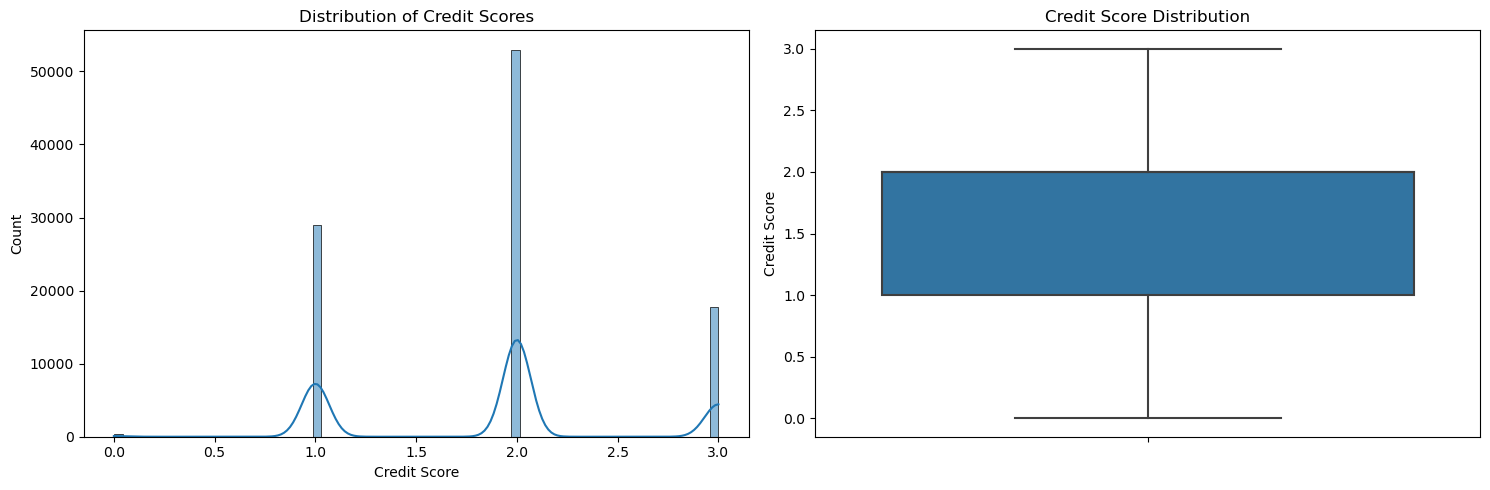


Credit Score Statistics:
--------------------------------------------------
count     : 100000.00
mean      :     1.88
std       :     0.68
min       :     0.00
25%       :     1.00
50%       :     2.00
75%       :     2.00
max       :     3.00

Count of Each Credit Score:
--------------------------------------------------
Score 0:      352 (  0.35%)
Score 1:    28953 ( 28.95%)
Score 2:    52974 ( 52.97%)
Score 3:    17721 ( 17.72%)


In [ ]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Histogram with KDE
sns.histplot(data=df, x='Credit_Score', kde=True, ax=ax1)
ax1.set_title('Distribution of Credit Scores')
ax1.set_xlabel('Credit Score')
ax1.set_ylabel('Count')

# Plot 2: Box plot
sns.boxplot(data=df, y='Credit_Score', ax=ax2)
ax2.set_title('Credit Score Distribution')
ax2.set_ylabel('Credit Score')

plt.tight_layout()
plt.show()

# Print statistics with better formatting
print("\nCredit Score Statistics:")
print("-" * 50)
stats = df['Credit_Score'].describe()
for stat, value in stats.items():
    print(f"{stat:10}: {value:8.2f}")

print("\nCount of Each Credit Score:")
print("-" * 50)
counts = df['Credit_Score'].value_counts().sort_index()
for score, count in counts.items():
    print(f"Score {score}: {count:8d} ({count/len(df)*100:6.2f}%)")

- **Credit scores cluster around 1 and 2**, with the 50th percentile at 2 and the mean at ~1.88, reflecting a skew toward higher scores.

- **Over half (53 %)** of customers fall in score 2, while the **very low 0 group** is tiny (just 0.35 %).

- The **upper tail (score 3)** accounts for about 18 %, and score 1 makes up ~29 %.

- Boxplot outliers are minimal—scores only range from 0 to 3—so no extreme anomalies beyond the defined categories.

## Exploring other features

### Numeric Features

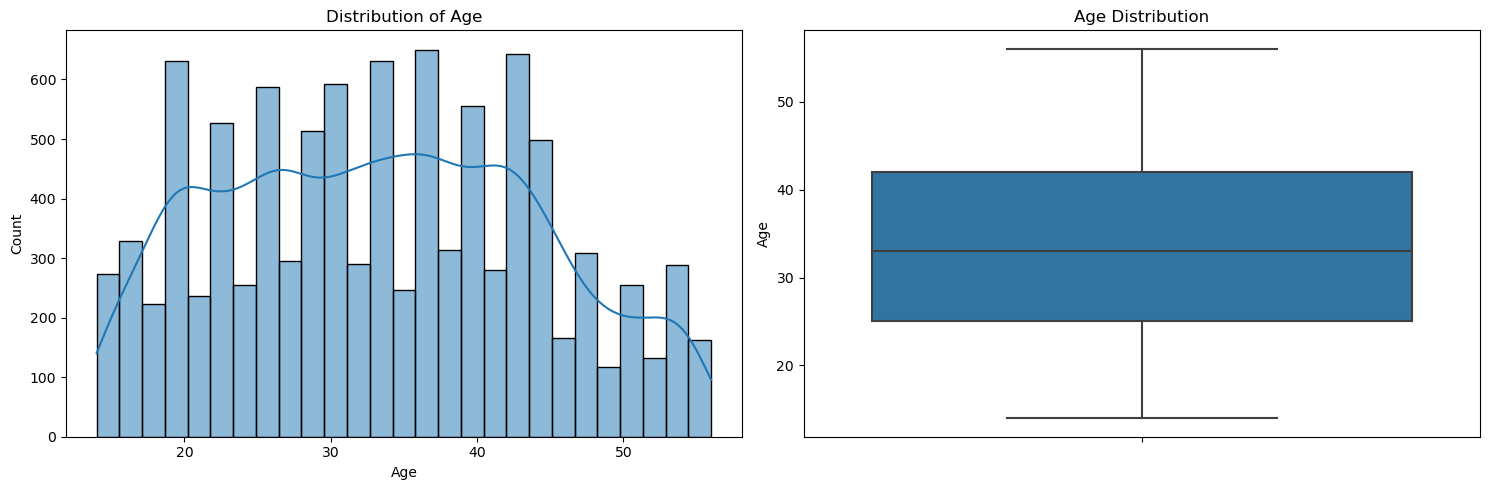


Age Statistics:
--------------------------------------------------
count     : 10000.00
mean      :    33.40
std       :    10.73
min       :    14.00
25%       :    25.00
50%       :    33.00
75%       :    42.00
max       :    56.00




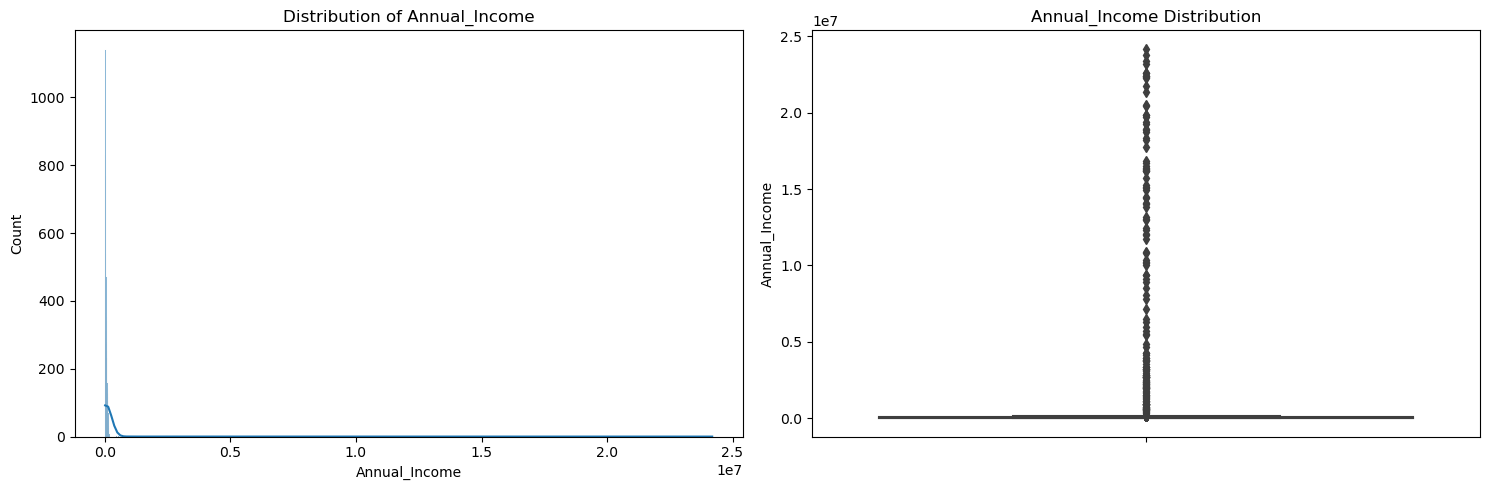


Annual_Income Statistics:
--------------------------------------------------
count     : 10000.00
mean      : 174812.64
std       : 1350322.67
min       :  7006.52
25%       : 20138.94
50%       : 40198.96
75%       : 76087.68
max       : 24188807.00




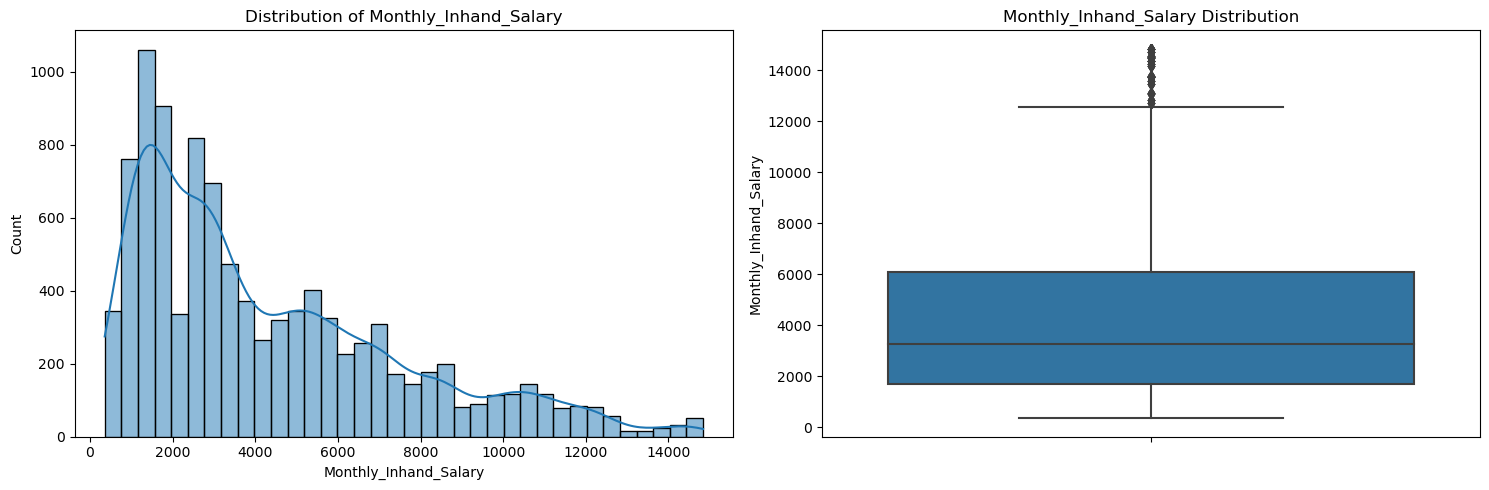


Monthly_Inhand_Salary Statistics:
--------------------------------------------------
count     : 10000.00
mean      :  4318.41
std       :  3206.23
min       :   355.21
25%       :  1684.83
50%       :  3260.47
75%       :  6094.43
max       : 14836.74




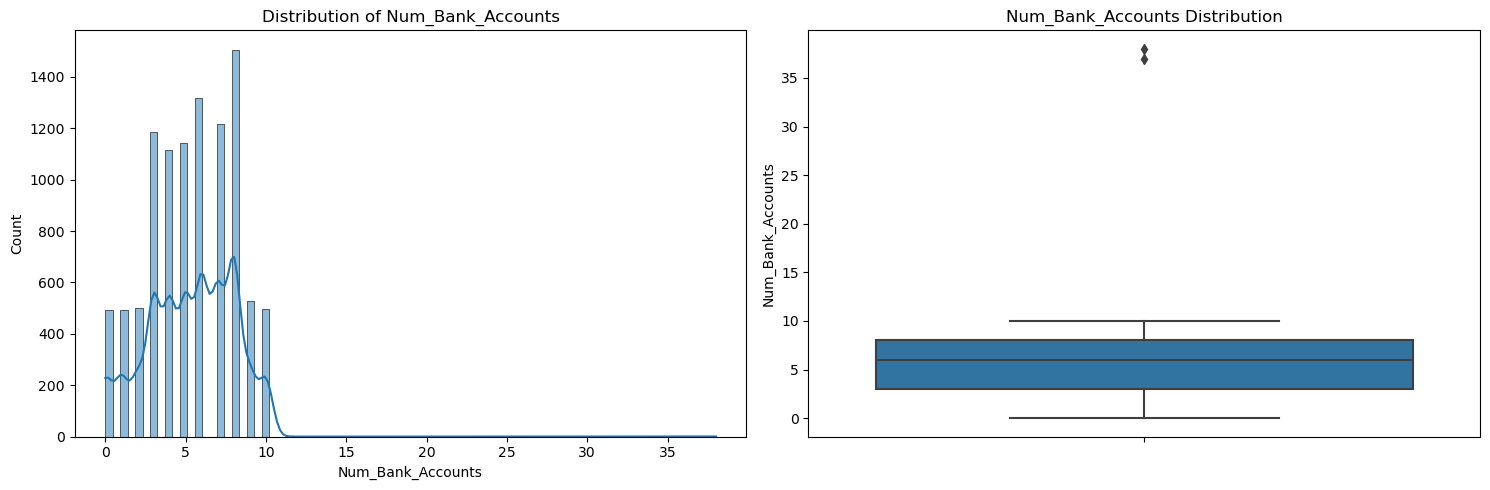


Num_Bank_Accounts Statistics:
--------------------------------------------------
count     : 10000.00
mean      :     5.35
std       :     2.68
min       :     0.00
25%       :     3.00
50%       :     6.00
75%       :     8.00
max       :    38.00




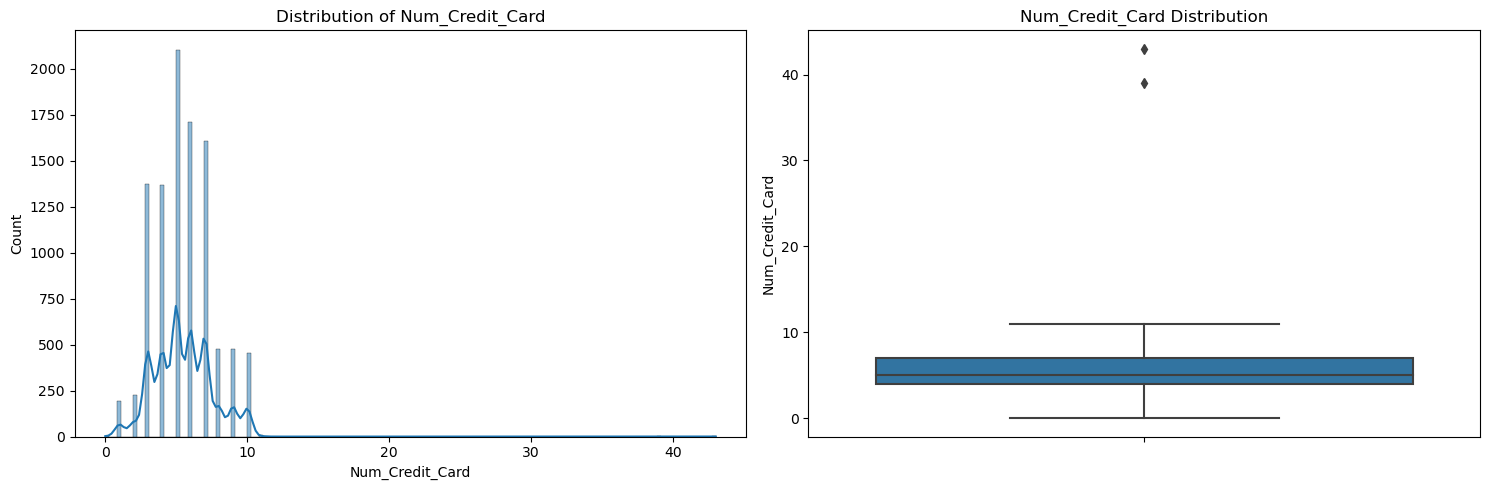


Num_Credit_Card Statistics:
--------------------------------------------------
count     : 10000.00
mean      :     5.50
std       :     2.09
min       :     0.00
25%       :     4.00
50%       :     5.00
75%       :     7.00
max       :    43.00




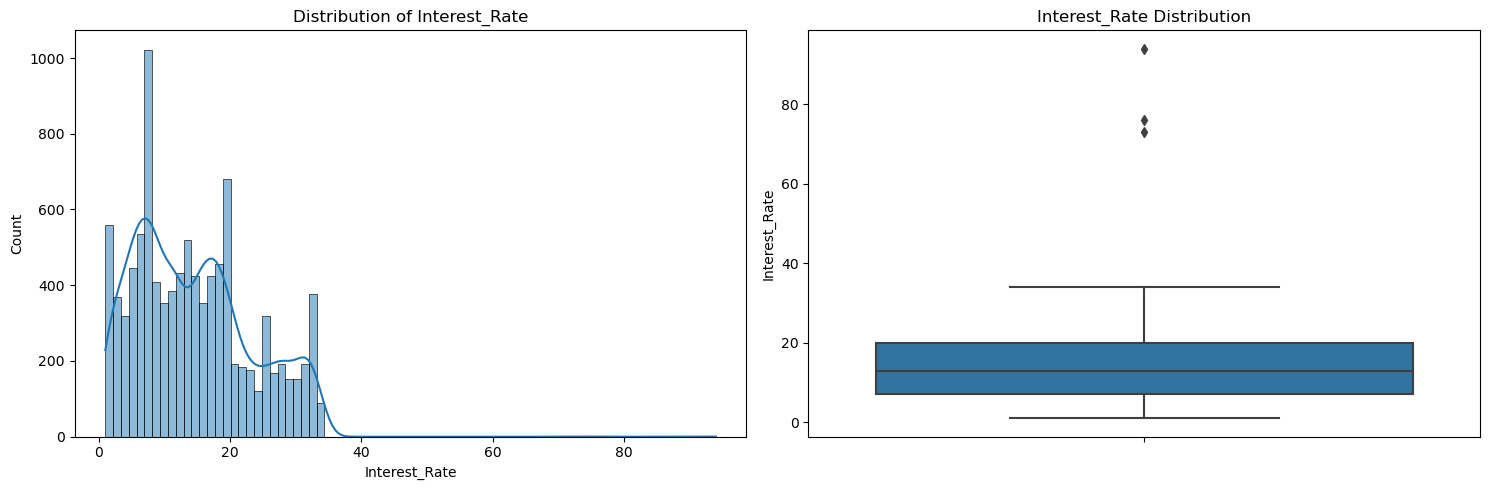


Interest_Rate Statistics:
--------------------------------------------------
count     : 10000.00
mean      :    14.42
std       :     8.90
min       :     1.00
25%       :     7.00
50%       :    13.00
75%       :    20.00
max       :    94.00




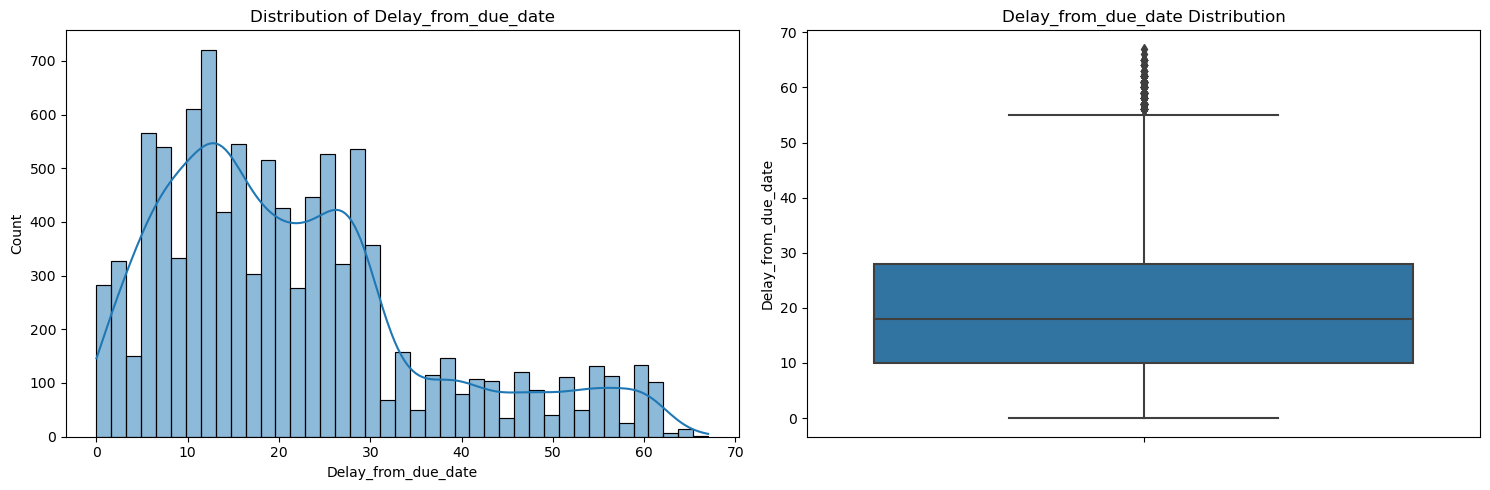


Delay_from_due_date Statistics:
--------------------------------------------------
count     : 10000.00
mean      :    21.31
std       :    14.59
min       :     0.00
25%       :    10.00
50%       :    18.00
75%       :    28.00
max       :    67.00




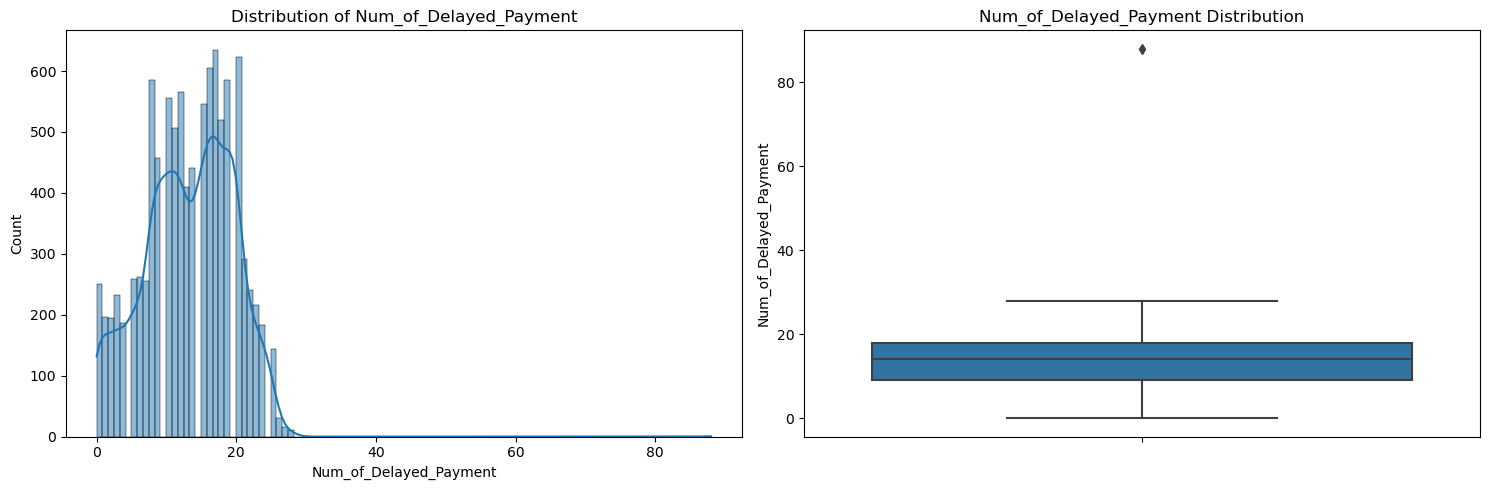


Num_of_Delayed_Payment Statistics:
--------------------------------------------------
count     : 10000.00
mean      :    13.24
std       :     6.33
min       :     0.00
25%       :     9.00
50%       :    14.00
75%       :    18.00
max       :    88.00




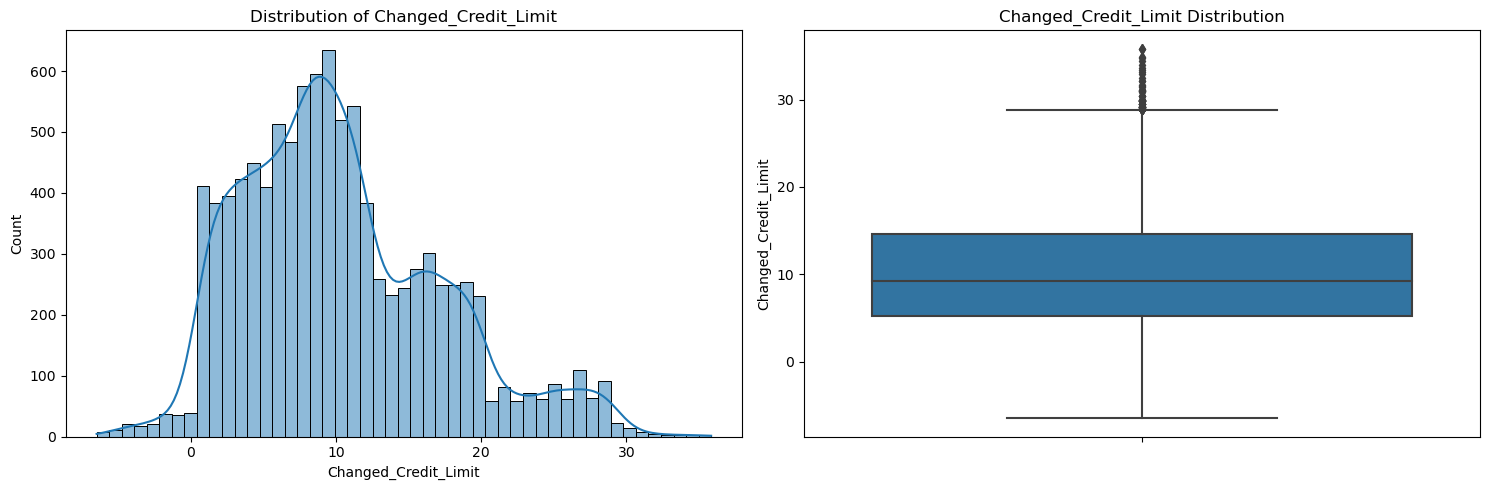


Changed_Credit_Limit Statistics:
--------------------------------------------------
count     : 10000.00
mean      :    10.32
std       :     6.86
min       :    -6.48
25%       :     5.20
50%       :     9.25
75%       :    14.66
max       :    35.83




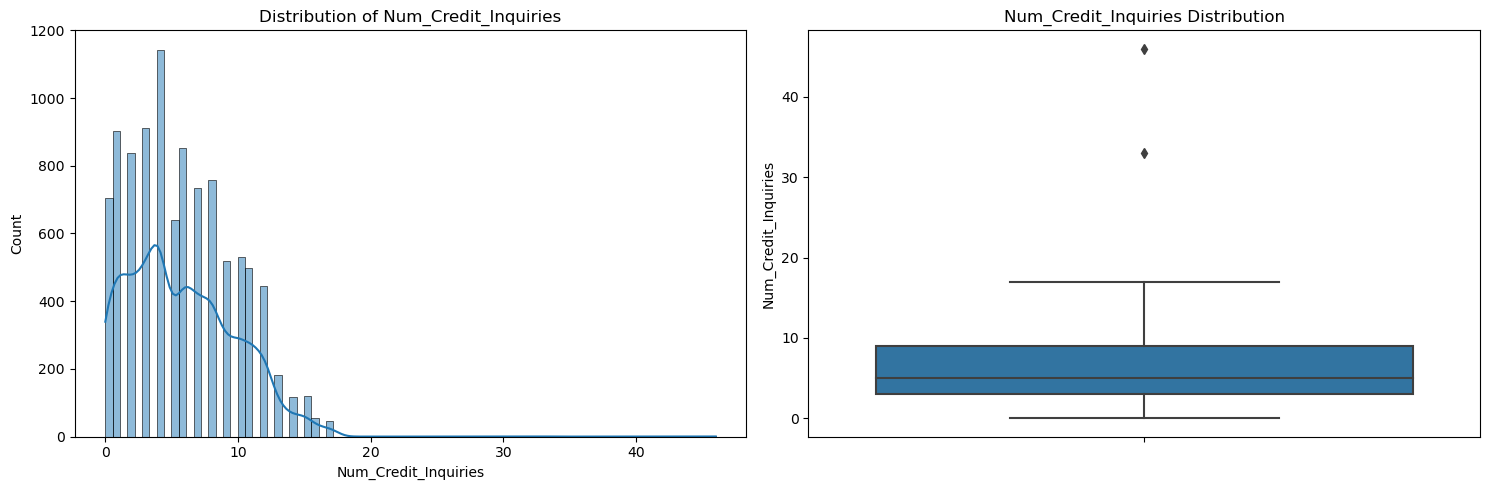


Num_Credit_Inquiries Statistics:
--------------------------------------------------
count     : 10000.00
mean      :     5.77
std       :     3.99
min       :     0.00
25%       :     3.00
50%       :     5.00
75%       :     9.00
max       :    46.00




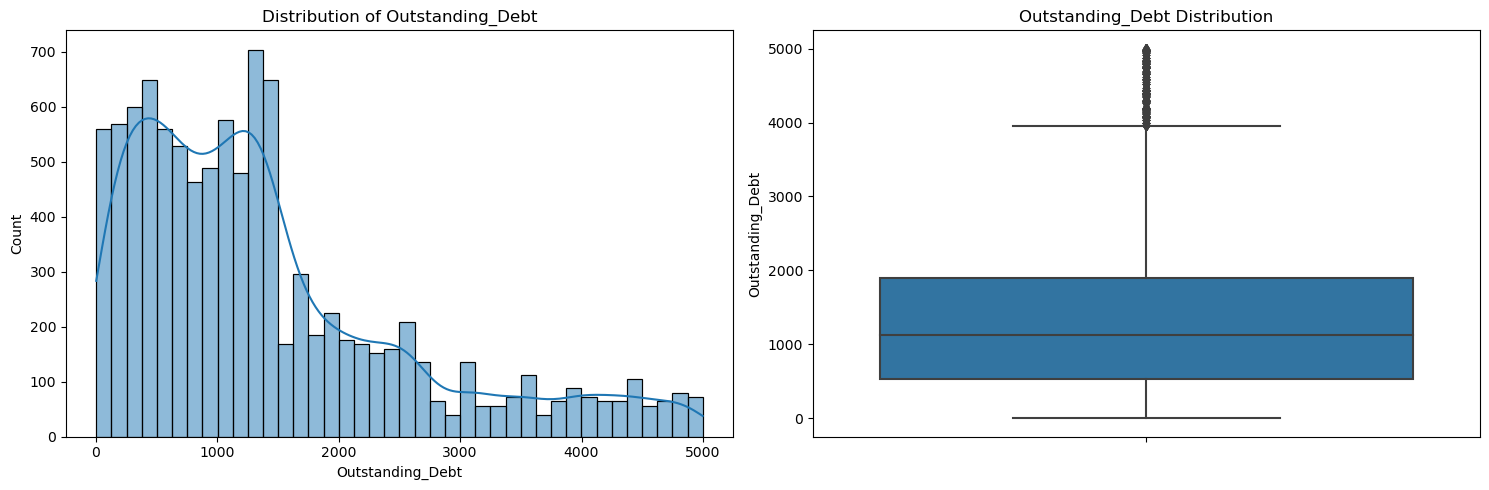


Outstanding_Debt Statistics:
--------------------------------------------------
count     : 10000.00
mean      :  1413.42
std       :  1174.38
min       :     1.48
25%       :   530.51
50%       :  1126.90
75%       :  1901.28
max       :  4998.07




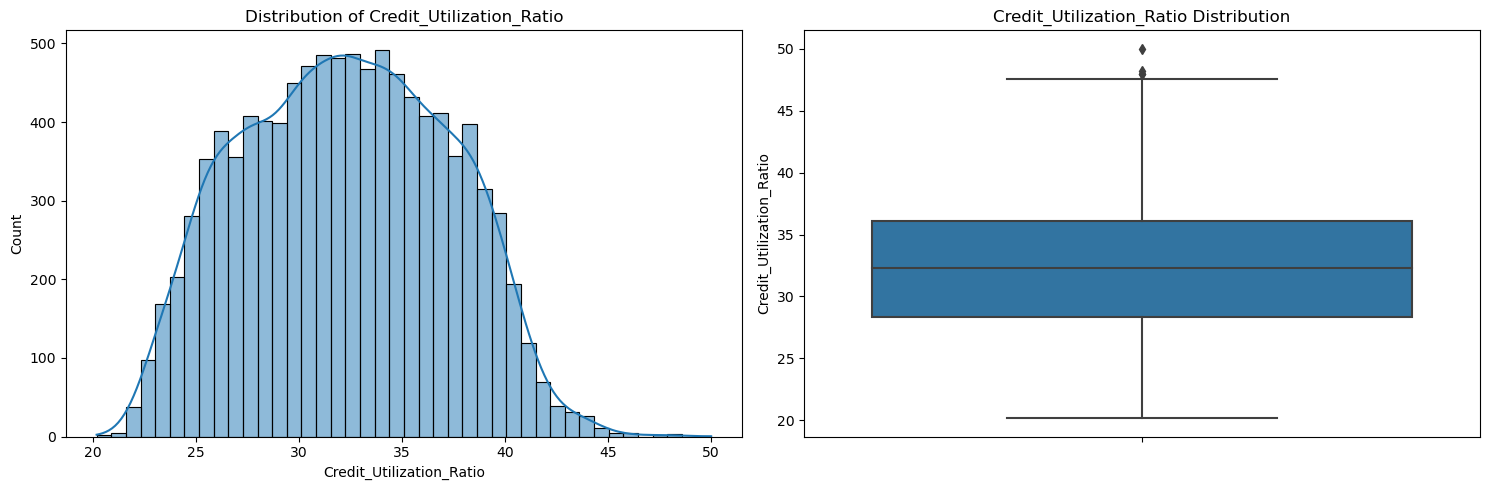


Credit_Utilization_Ratio Statistics:
--------------------------------------------------
count     : 10000.00
mean      :    32.26
std       :     4.94
min       :    20.17
25%       :    28.34
50%       :    32.26
75%       :    36.08
max       :    50.00




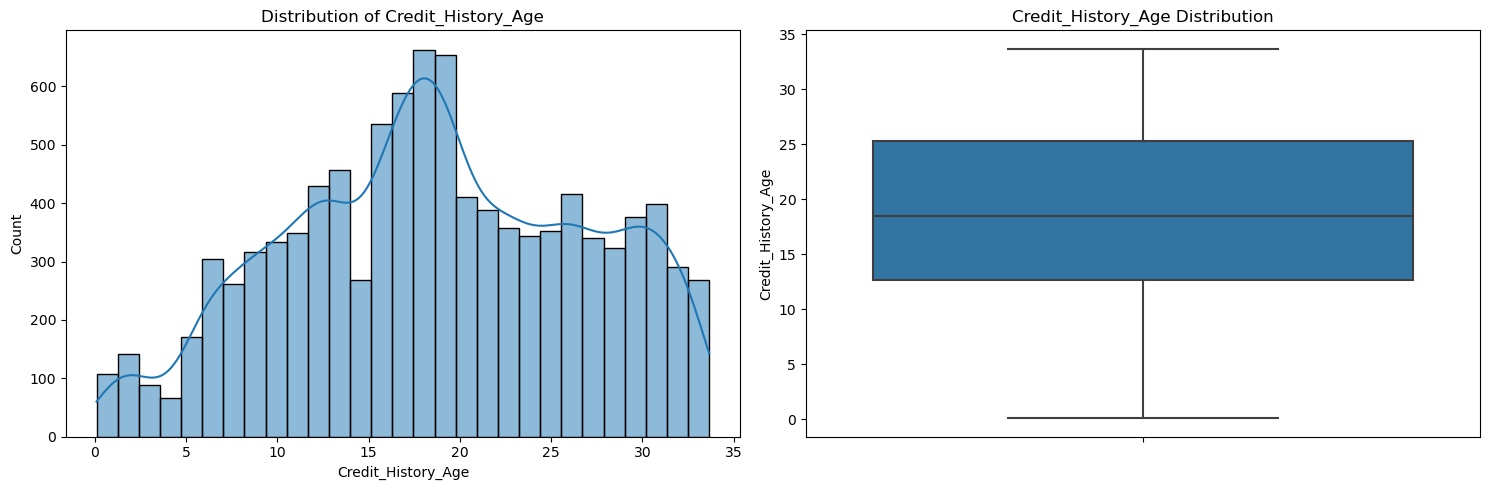


Credit_History_Age Statistics:
--------------------------------------------------
count     : 10000.00
mean      :    18.66
std       :     8.12
min       :     0.08
25%       :    12.67
50%       :    18.50
75%       :    25.25
max       :    33.67




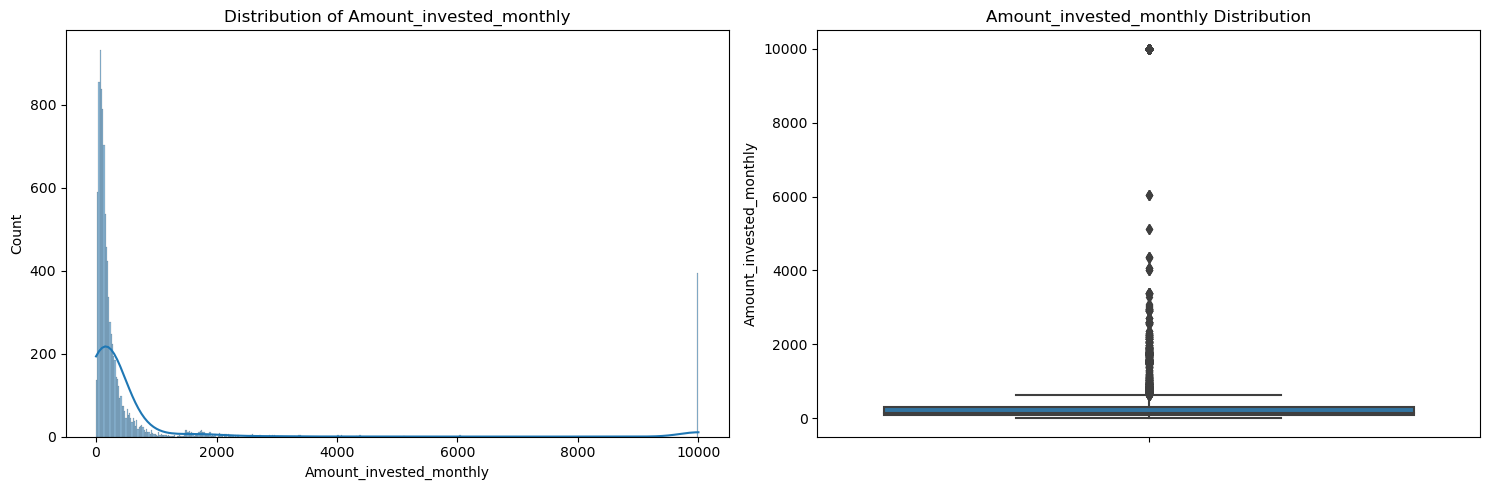


Amount_invested_monthly Statistics:
--------------------------------------------------
count     : 10000.00
mean      :   646.15
std       :  1937.02
min       :     0.00
25%       :    80.66
50%       :   146.92
75%       :   298.74
max       : 10000.00




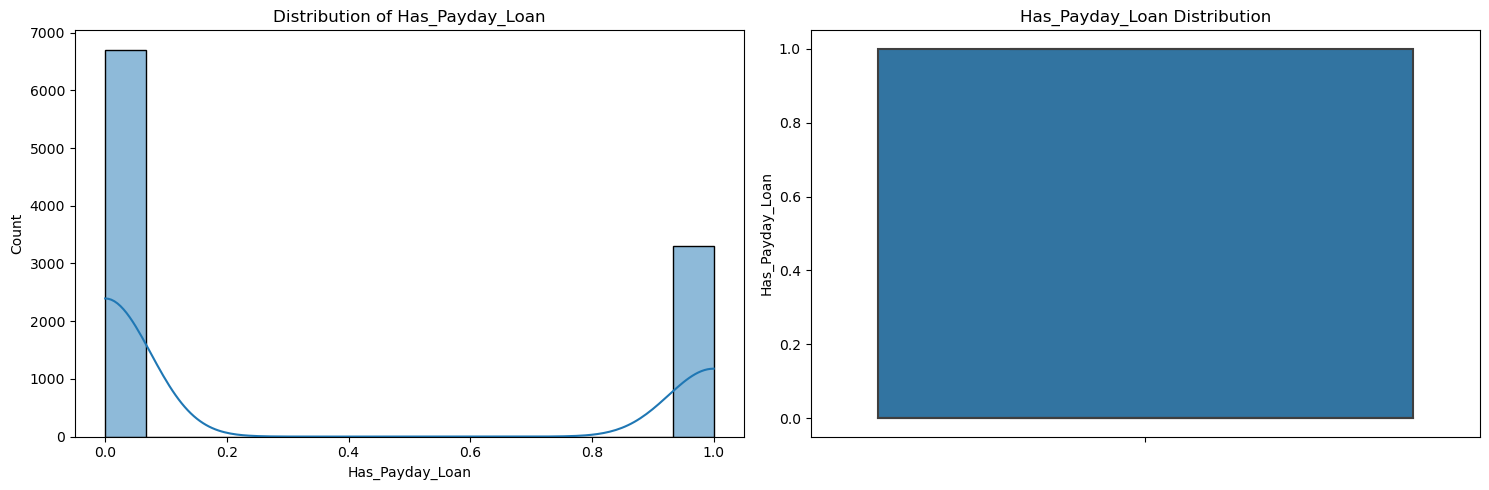


Has_Payday_Loan Statistics:
--------------------------------------------------
count     : 10000.00
mean      :     0.33
std       :     0.47
min       :     0.00
25%       :     0.00
50%       :     0.00
75%       :     1.00
max       :     1.00




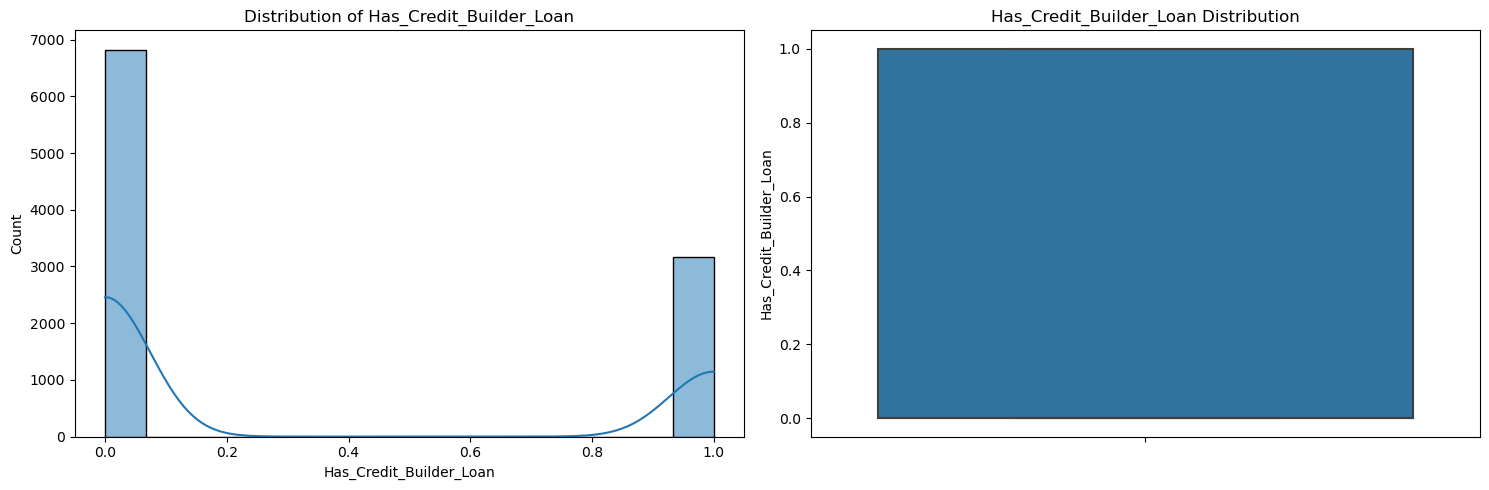


Has_Credit_Builder_Loan Statistics:
--------------------------------------------------
count     : 10000.00
mean      :     0.32
std       :     0.47
min       :     0.00
25%       :     0.00
50%       :     0.00
75%       :     1.00
max       :     1.00




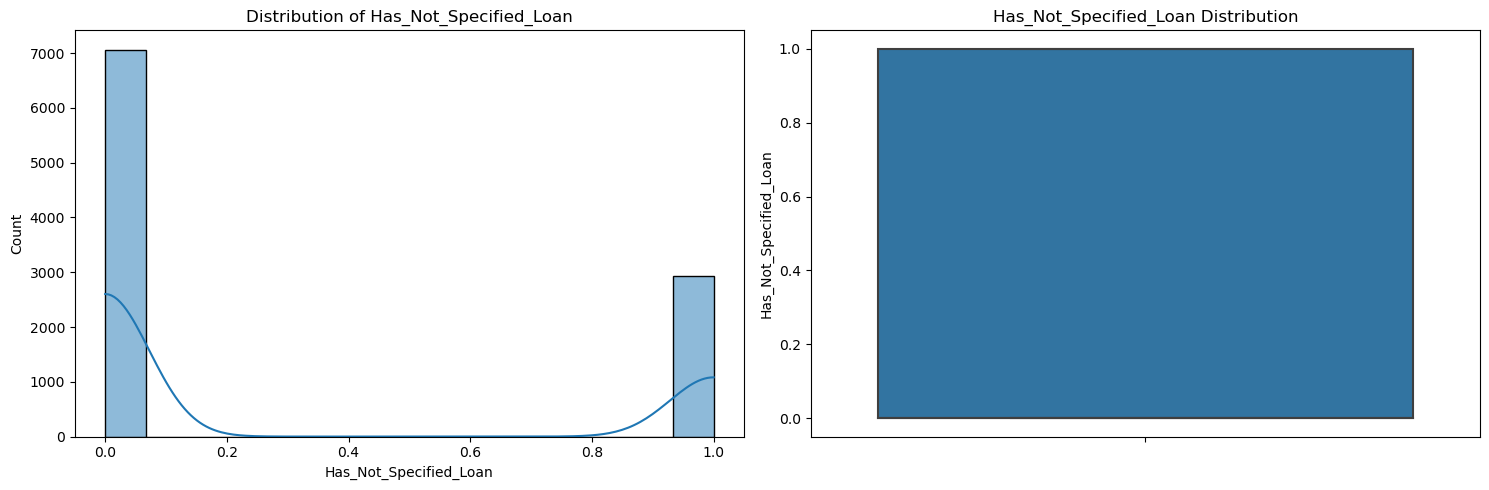


Has_Not_Specified_Loan Statistics:
--------------------------------------------------
count     : 10000.00
mean      :     0.29
std       :     0.46
min       :     0.00
25%       :     0.00
50%       :     0.00
75%       :     1.00
max       :     1.00




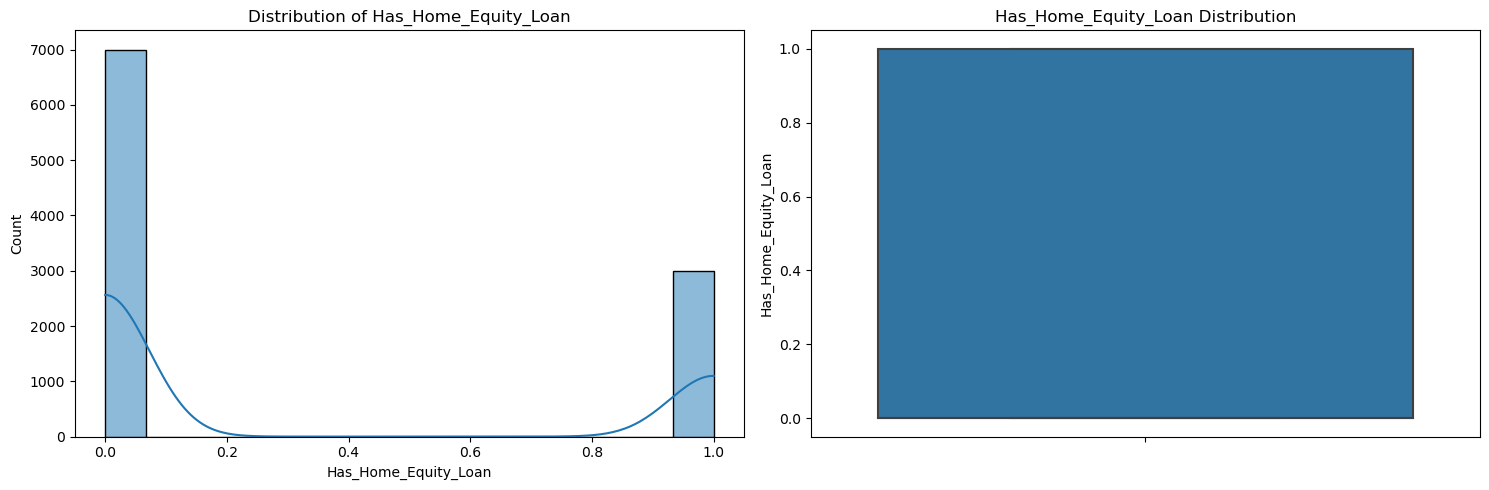


Has_Home_Equity_Loan Statistics:
--------------------------------------------------
count     : 10000.00
mean      :     0.30
std       :     0.46
min       :     0.00
25%       :     0.00
50%       :     0.00
75%       :     1.00
max       :     1.00




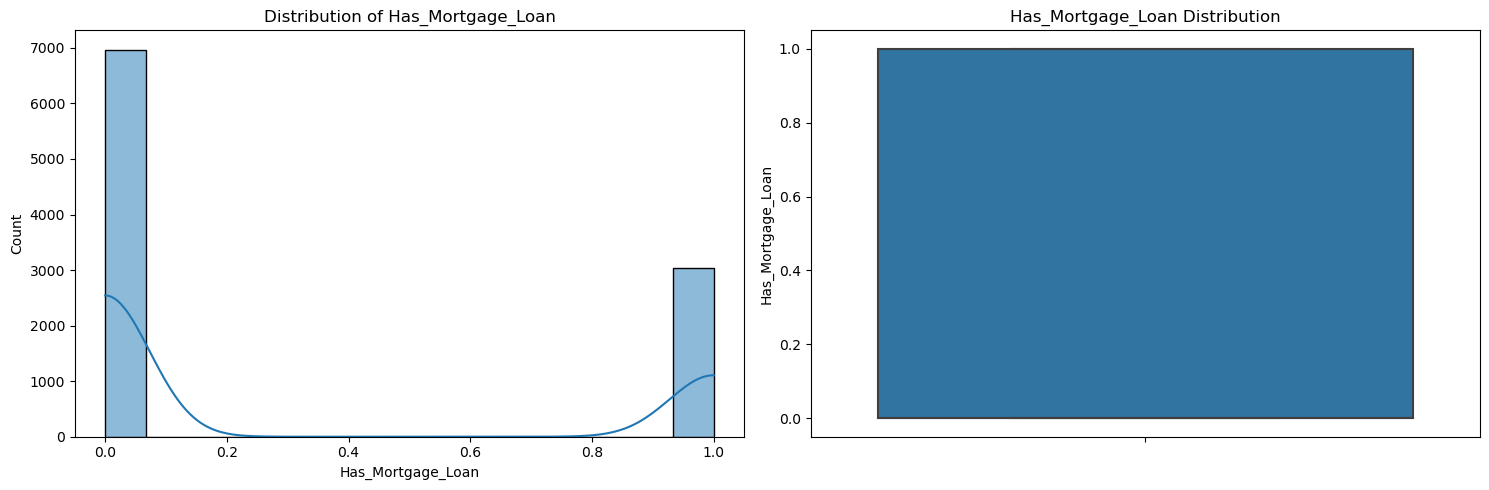


Has_Mortgage_Loan Statistics:
--------------------------------------------------
count     : 10000.00
mean      :     0.30
std       :     0.46
min       :     0.00
25%       :     0.00
50%       :     0.00
75%       :     1.00
max       :     1.00




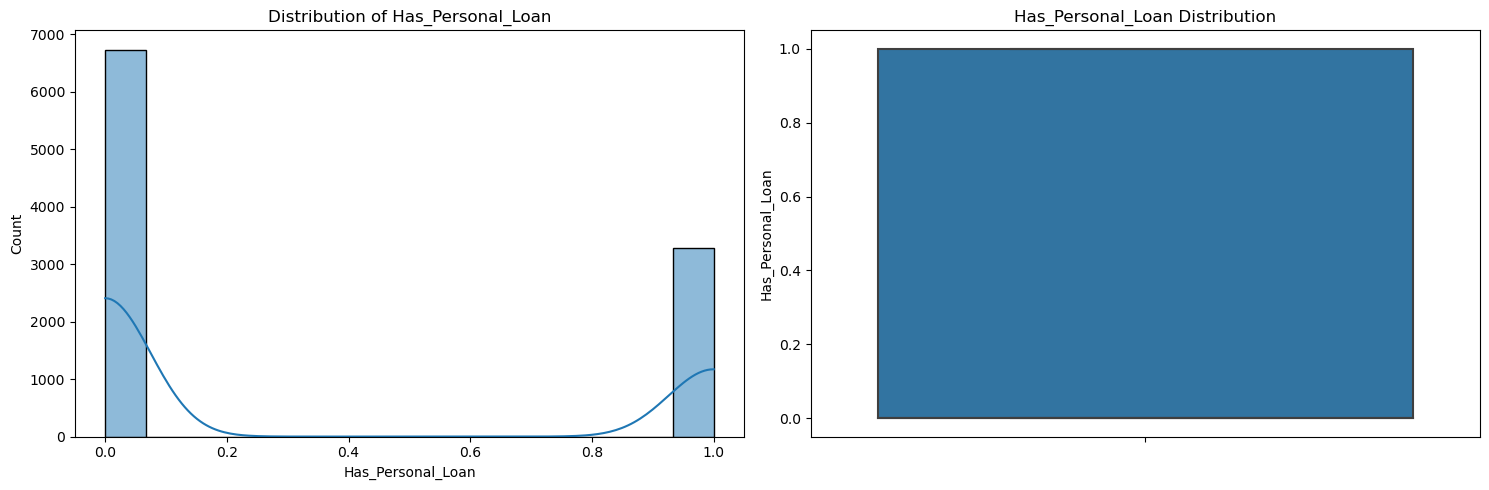


Has_Personal_Loan Statistics:
--------------------------------------------------
count     : 10000.00
mean      :     0.33
std       :     0.47
min       :     0.00
25%       :     0.00
50%       :     0.00
75%       :     1.00
max       :     1.00




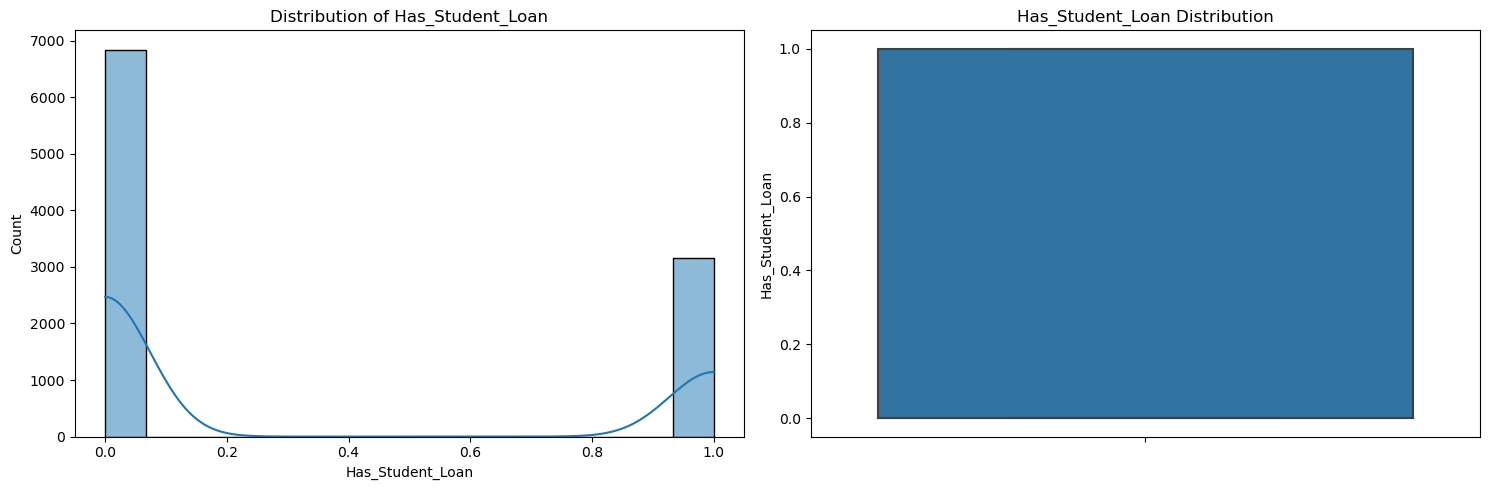


Has_Student_Loan Statistics:
--------------------------------------------------
count     : 10000.00
mean      :     0.32
std       :     0.46
min       :     0.00
25%       :     0.00
50%       :     0.00
75%       :     1.00
max       :     1.00




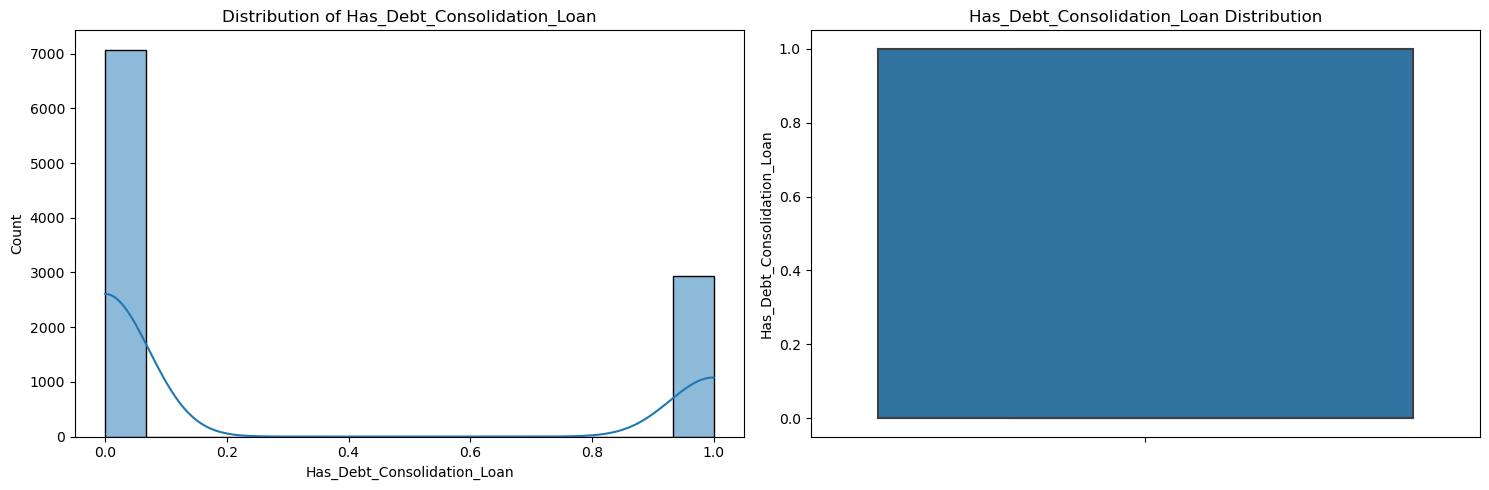


Has_Debt_Consolidation_Loan Statistics:
--------------------------------------------------
count     : 10000.00
mean      :     0.29
std       :     0.46
min       :     0.00
25%       :     0.00
50%       :     0.00
75%       :     1.00
max       :     1.00




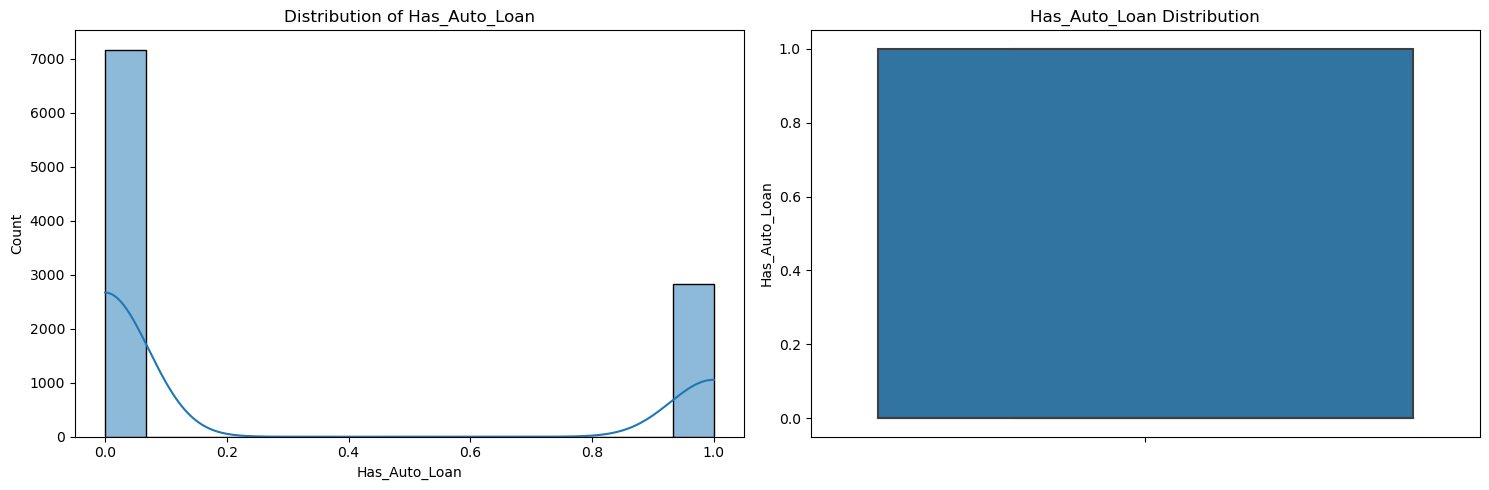


Has_Auto_Loan Statistics:
--------------------------------------------------
count     : 10000.00
mean      :     0.28
std       :     0.45
min       :     0.00
25%       :     0.00
50%       :     0.00
75%       :     1.00
max       :     1.00




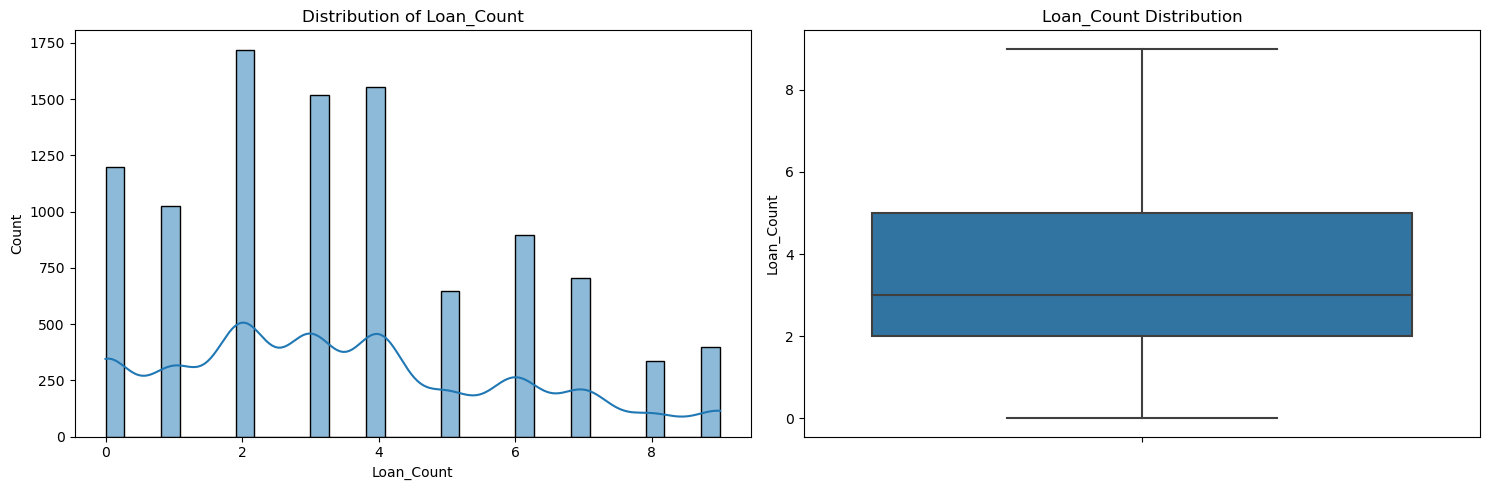


Loan_Count Statistics:
--------------------------------------------------
count     : 10000.00
mean      :     3.51
std       :     2.46
min       :     0.00
25%       :     2.00
50%       :     3.00
75%       :     5.00
max       :     9.00




In [8]:
list_numerical_features = get_numerical_features(df)
numeric_features = [col for col in list_numerical_features if col != 'Credit_Score']


for col in numeric_features:
    # Create figure with 2 subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Plot 1: Histogram with KDE
    sns.histplot(data=df, x=col, kde=True, ax=ax1)
    ax1.set_title(f'Distribution of {col}')
    ax1.set_xlabel(col)
    ax1.set_ylabel('Count')
    
    # Plot 2: Box plot
    sns.boxplot(data=df, y=col, ax=ax2)
    ax2.set_title(f'{col} Distribution')
    ax2.set_ylabel(col)
    
    plt.tight_layout()
    plt.show()
    
    # Print statistics
    print(f"\n{col} Statistics:")
    print("-" * 50)
    stats = df[col].describe()
    for stat, value in stats.items():
        print(f"{stat:10}: {value:8.2f}")
    print("\n")

- **Age** sits tightly between 24 and 42 (IQR), with a median of 33 and only **7** extreme values above ~62 or below ~4—mostly young-to-middle-aged customers. 

- **Annual Income** is **heavily right-skewed** (median ≈ \$38 k vs. mean ≈ \$176 k), with ~3 255 high-income outliers (up to \$24 M).  

- **Monthly In-hand Salary** also skews right (median ≈ \$3 097 vs. mean ≈ \$4 199), showing ~2 017 earners well above the typical range.  

- **Bank accounts (median 5) and credit cards (median 5)** both cluster tightly (IQRs of 3–7 and 4–7 respectively), with very few customers holding > 10.  

- **Interest rates** span from 1 % to 100 %, but 50 % of customers lie between 7 % and 20 %, and only 19 cases exceed the upper whisker.  

- **Payment delays** average ~18 days (IQR 10–28), yet almost 4 000 customers have exceptionally long delays beyond ~43 days.  

- **Number of delayed payments** centers at 14 (IQR 9–18) with very few extreme delinquencies.  

- **Credit limit changes** (median ≈ 9.4 k) vary from –6.5 k to ~37 k, with ~756 customers experiencing unusually large shifts.  

- **Credit inquiries** are modest (median 5, IQR 3–8), though ~789 customers requested > 13 inquiries.  

- **Outstanding debt** clusters around \$1.17 k (IQR \$566–\$1.95 k), but ~5 272 customers carry very high balances.  

- **Utilization ratio** is narrowly spread (IQR ~28–36 %), with only 16 cases beyond typical bounds.  

- **Credit history length** is very uniform (median ~18 years, IQR 12–25), with no extreme outliers.  

- **Monthly investments** skew sharply (median ≈ \$143, IQR \$79–\$291), and a large tail (~11 666 cases) invests substantially more.  

- **Loan count** is low-to-moderate (median 3, IQR 2–5), ranging 0–9 with no values beyond whiskers.  

- All binary “Has_X_Loan” flags hover around **31 %**, indicating similar prevalence across loan types.  

### Relationship Between Numeric Features and Credit Score


Analysis of Age vs Credit_Score
--------------------------------------------------


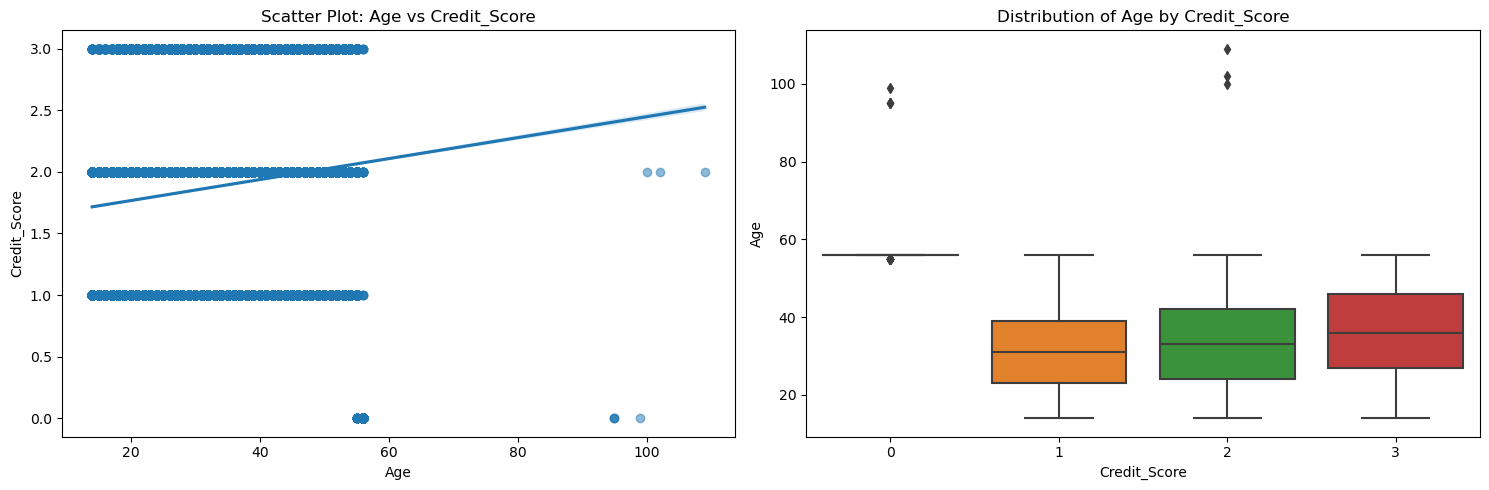


Statistical Summary:
------------------------------
              count       mean        std  min  max
Credit_Score                                       
0               352  56.400568   4.261575   55   99
1             28953  31.144994   9.945425   14   56
2             52974  33.351267  10.742607   14  109
3             17721  36.273517  11.032379   14   56

Correlation between Age and Credit_Score: 0.134

Analysis of Annual_Income vs Credit_Score
--------------------------------------------------


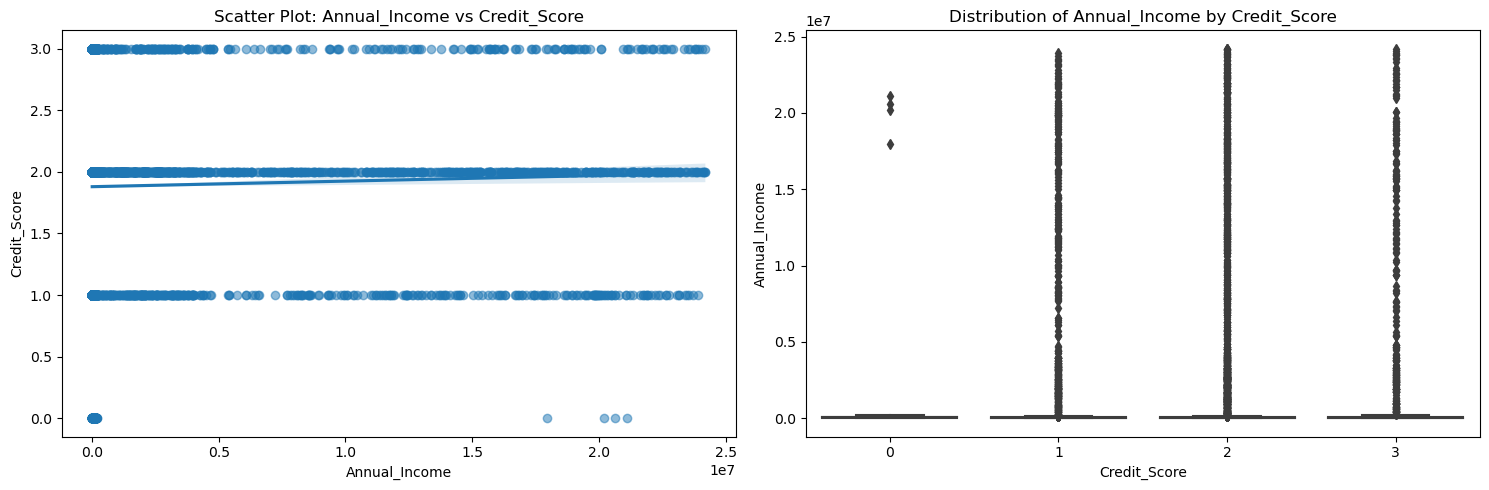


Statistical Summary:
------------------------------
              count           mean           std        min         max
Credit_Score                                                           
0               352  289236.474659  2.116603e+06  12151.750  21111055.0
1             28953  151400.827684  1.281815e+06   7005.930  23912939.0
2             52974  184936.011850  1.402748e+06   7006.035  24188807.0
3             17721  188052.876174  1.371691e+06   7189.540  24198062.0

Correlation between Annual_Income and Credit_Score: 0.009

Analysis of Monthly_Inhand_Salary vs Credit_Score
--------------------------------------------------


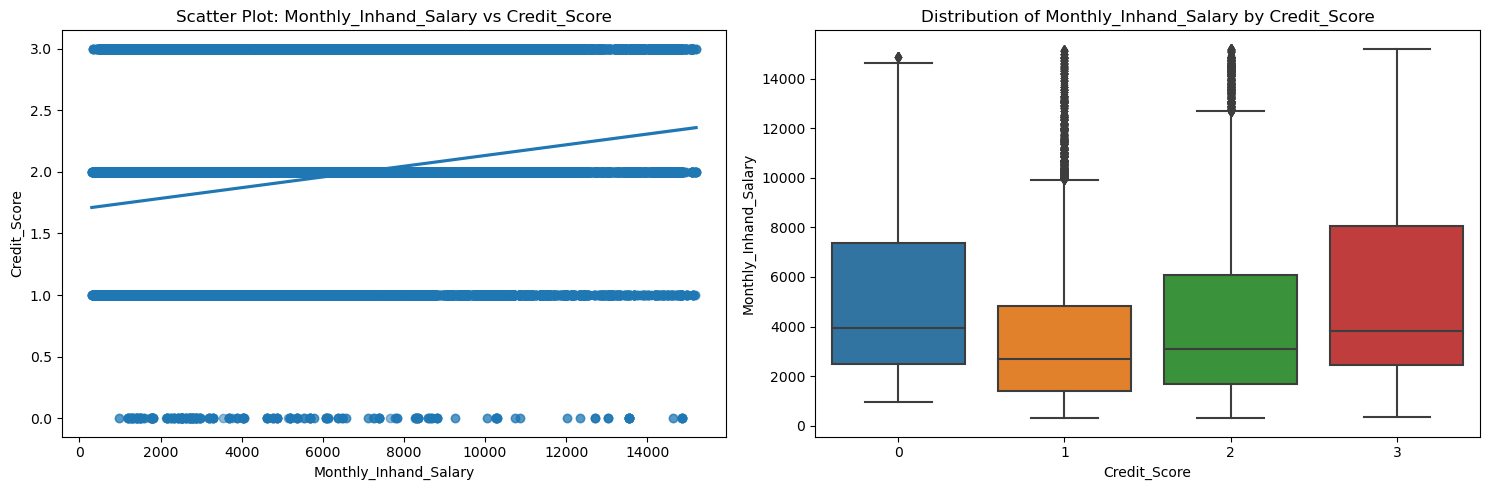


Statistical Summary:
------------------------------
              count         mean          std         min          max
Credit_Score                                                          
0               352  5217.705748  3676.886886  963.919167  14855.93000
1             28953  3379.415916  2664.429028  319.556250  15167.18000
2             52974  4239.127690  3128.109998  303.645417  15204.63333
3             17721  5396.938904  3696.046579  332.128333  15204.63333

Correlation between Monthly_Inhand_Salary and Credit_Score: 0.203

Analysis of Num_Bank_Accounts vs Credit_Score
--------------------------------------------------


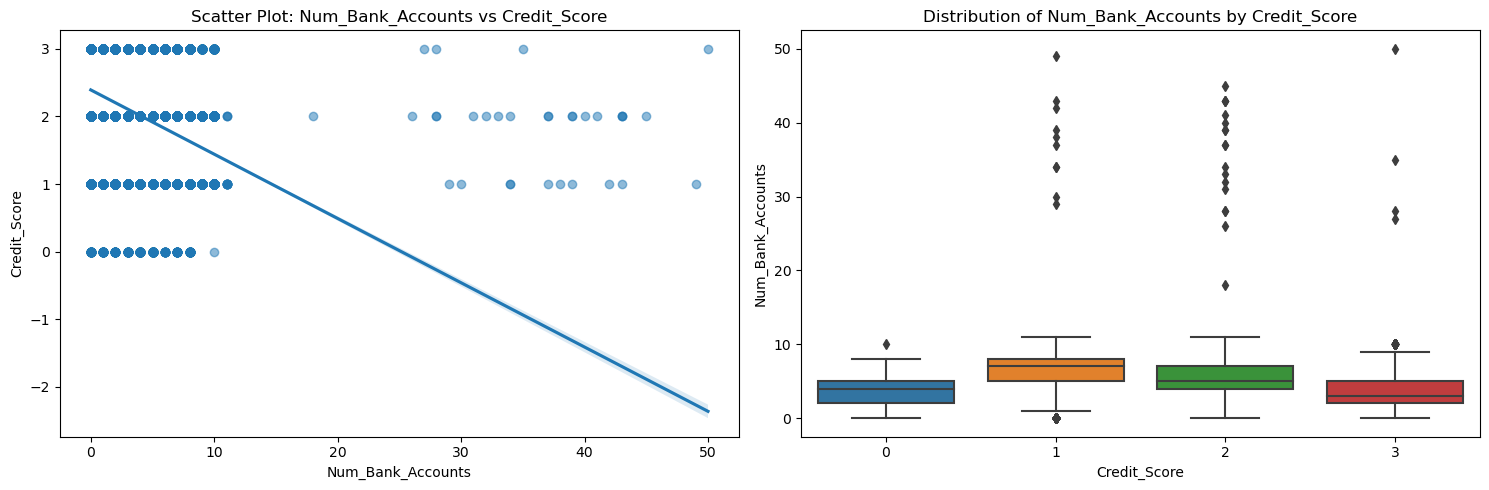


Statistical Summary:
------------------------------
              count      mean       std  min  max
Credit_Score                                     
0               352  3.914773  2.464242    0   10
1             28953  6.544400  2.569920    0   49
2             52974  5.398309  2.429353    0   45
3             17721  3.450257  2.273540    0   50

Correlation between Num_Bank_Accounts and Credit_Score: -0.369

Analysis of Num_Credit_Card vs Credit_Score
--------------------------------------------------


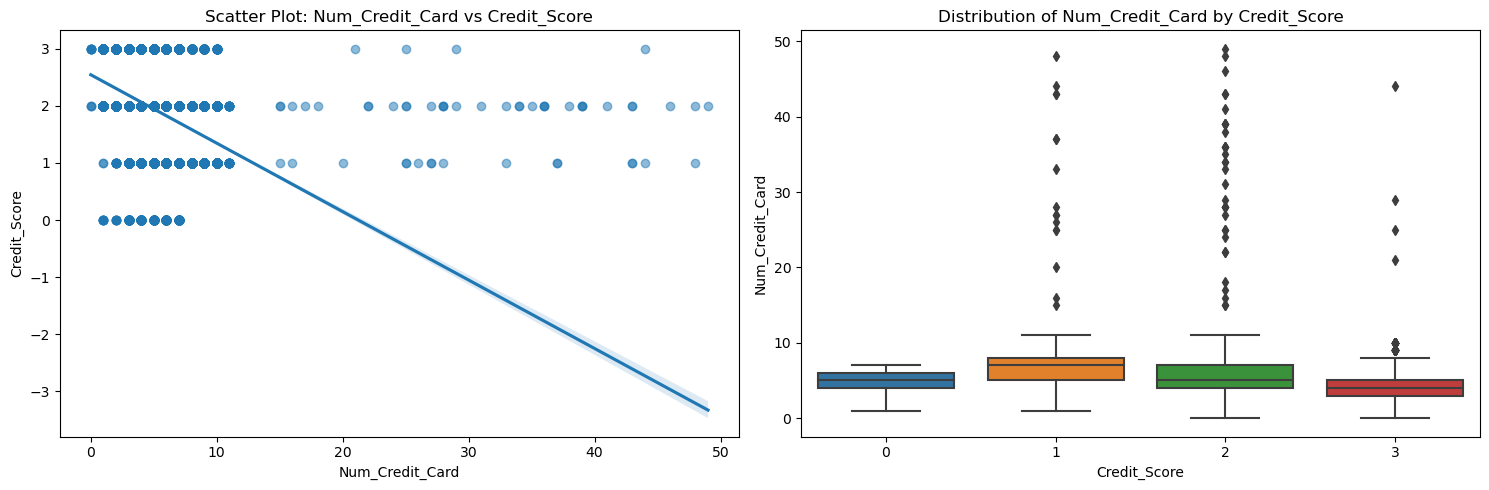


Statistical Summary:
------------------------------
              count      mean       std  min  max
Credit_Score                                     
0               352  4.835227  1.558401    1    7
1             28953  6.639485  2.081701    1   48
2             52974  5.422924  1.985462    0   49
3             17721  4.147001  1.859544    0   44

Correlation between Num_Credit_Card and Credit_Score: -0.379

Analysis of Interest_Rate vs Credit_Score
--------------------------------------------------


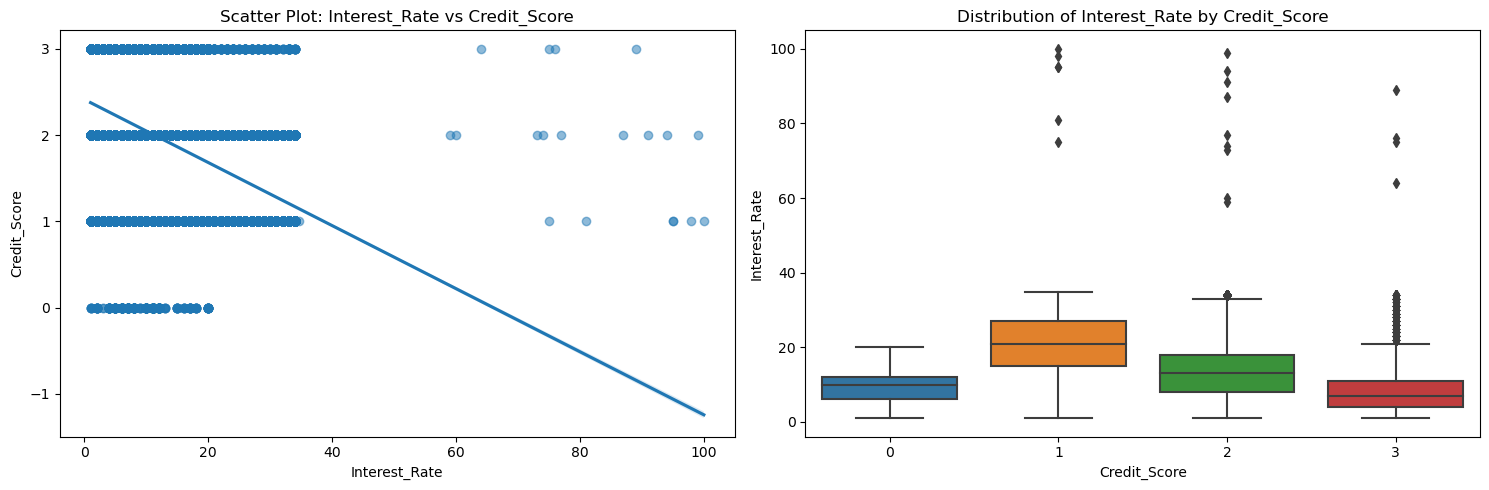


Statistical Summary:
------------------------------
              count       mean       std  min    max
Credit_Score                                        
0               352   9.613636  4.545263  1.0   20.0
1             28953  20.224054  8.914905  1.0  100.0
2             52974  13.773139  7.736129  1.0   99.0
3             17721   7.681306  4.999546  1.0   89.0

Correlation between Interest_Rate and Credit_Score: -0.471

Analysis of Delay_from_due_date vs Credit_Score
--------------------------------------------------


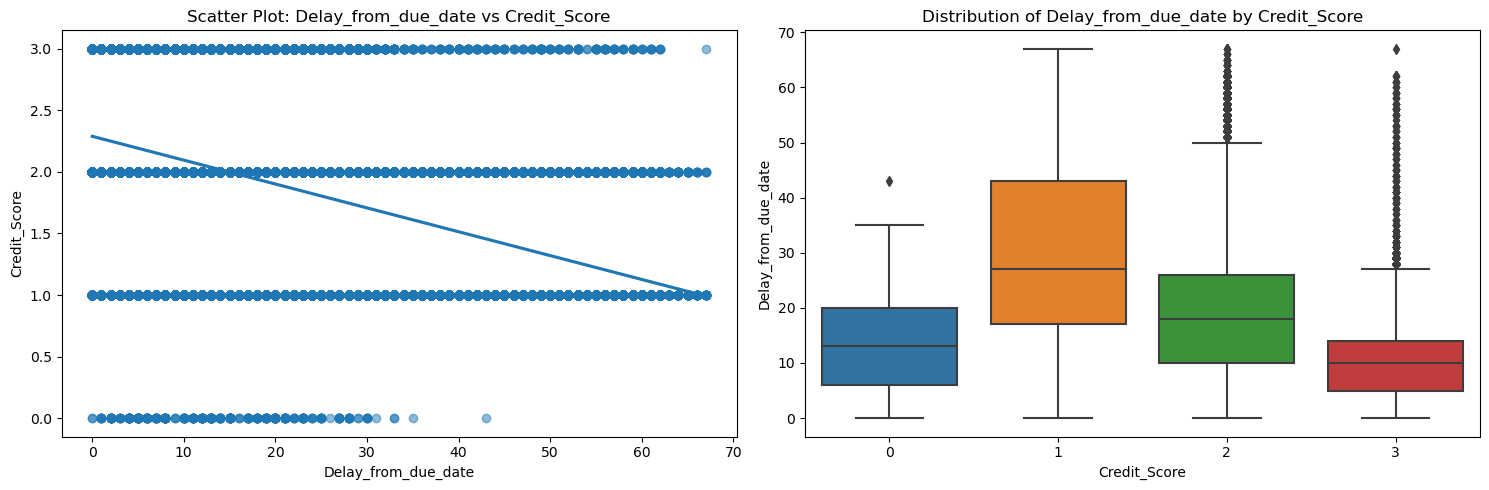


Statistical Summary:
------------------------------
              count       mean        std  min  max
Credit_Score                                       
0               352  13.588068   8.138976    0   43
1             28953  29.767969  16.293748    0   67
2             52974  19.773417  12.964709    0   67
3             17721  10.953219   8.367619    0   67

Correlation between Delay_from_due_date and Credit_Score: -0.420

Analysis of Num_of_Delayed_Payment vs Credit_Score
--------------------------------------------------


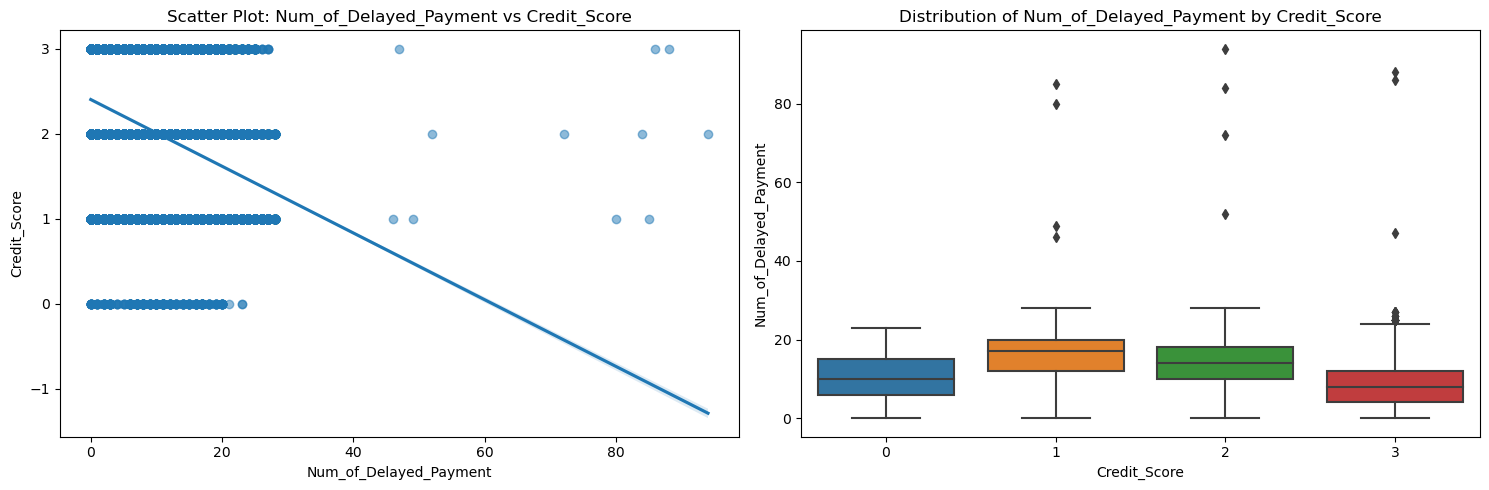


Statistical Summary:
------------------------------
              count       mean       std  min  max
Credit_Score                                      
0               352  10.011364  5.610317    0   23
1             28953  15.852451  6.142314    0   85
2             52974  13.551705  5.670117    0   94
3             17721   8.552960  5.623689    0   88

Correlation between Num_of_Delayed_Payment and Credit_Score: -0.362

Analysis of Changed_Credit_Limit vs Credit_Score
--------------------------------------------------


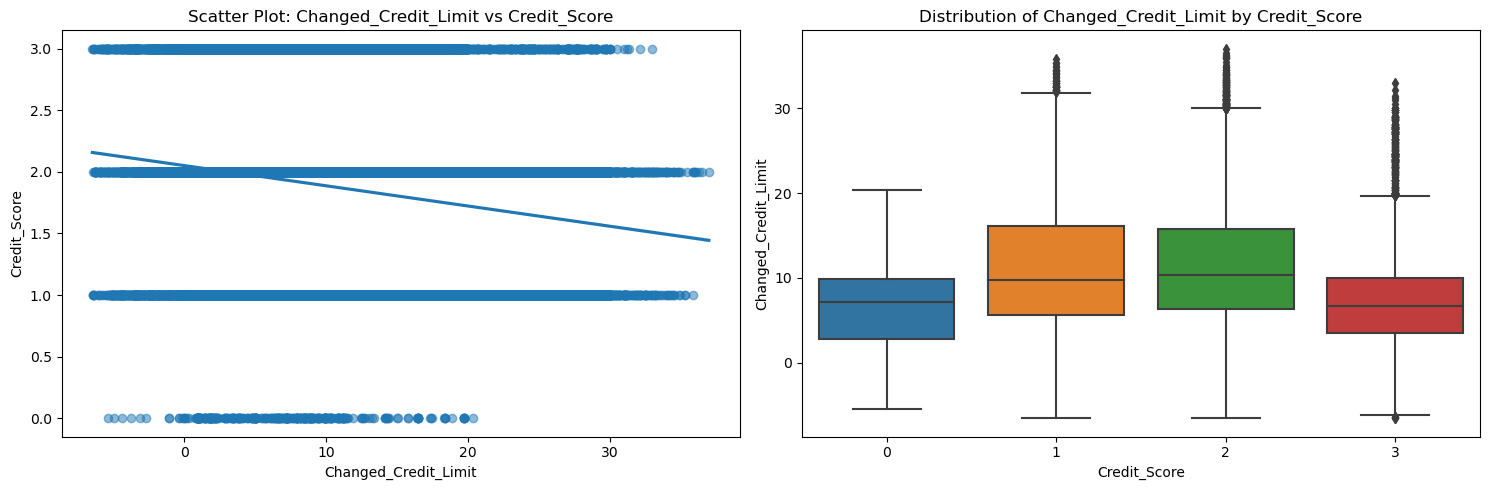


Statistical Summary:
------------------------------
              count       mean       std   min    max
Credit_Score                                         
0               352   6.924908  4.922020 -5.41  20.35
1             28953  11.052168  7.134488 -6.45  35.82
2             52974  11.147224  6.765365 -6.43  36.97
3             17721   7.099900  4.896638 -6.49  32.98

Correlation between Changed_Credit_Limit and Credit_Score: -0.163

Analysis of Num_Credit_Inquiries vs Credit_Score
--------------------------------------------------


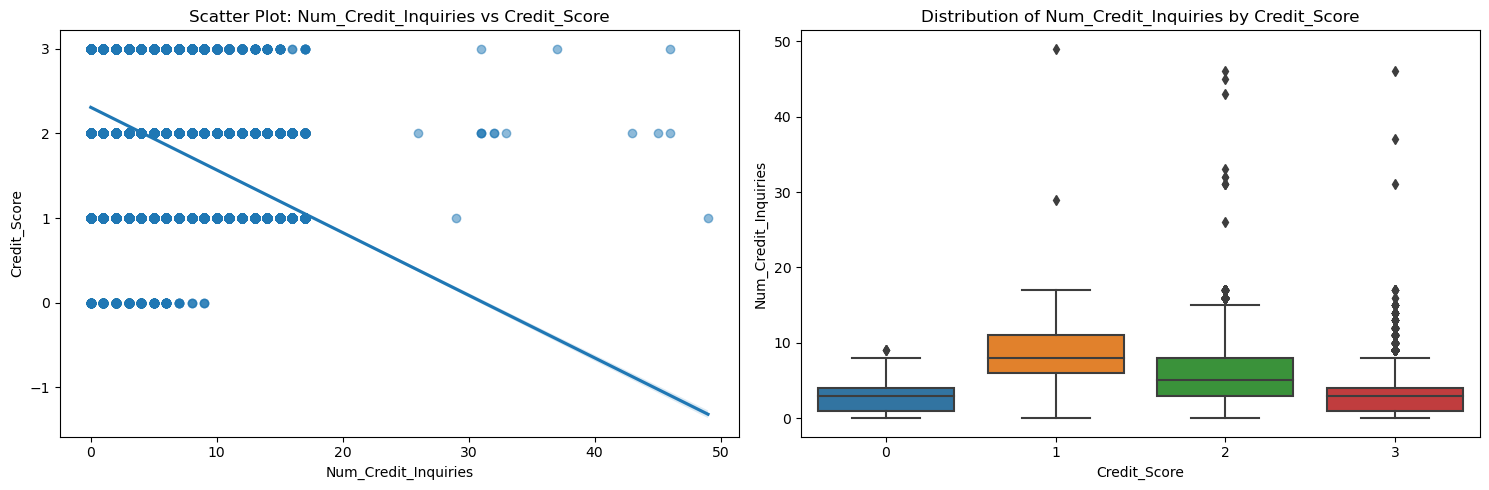


Statistical Summary:
------------------------------
              count      mean       std  min  max
Credit_Score                                     
0               352  2.812500  1.862530    0    9
1             28953  8.162470  3.726292    0   49
2             52974  5.325027  3.610869    0   46
3             17721  3.276621  2.606880    0   46

Correlation between Num_Credit_Inquiries and Credit_Score: -0.420

Analysis of Outstanding_Debt vs Credit_Score
--------------------------------------------------


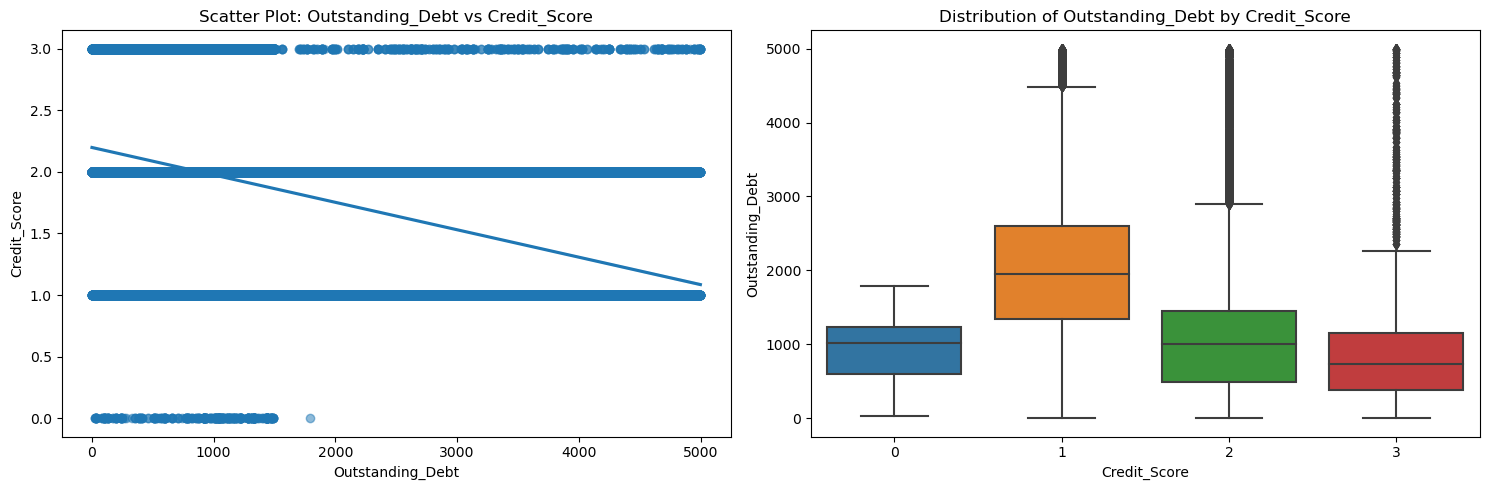


Statistical Summary:
------------------------------
              count         mean          std    min      max
Credit_Score                                                 
0               352   905.219858   431.081809  27.19  1788.63
1             28953  2082.907828  1144.231540   0.54  4997.10
2             52974  1280.015735  1134.243577   0.23  4998.07
3             17721   800.711942   613.181939   0.23  4998.07

Correlation between Outstanding_Debt and Credit_Score: -0.377

Analysis of Credit_Utilization_Ratio vs Credit_Score
--------------------------------------------------


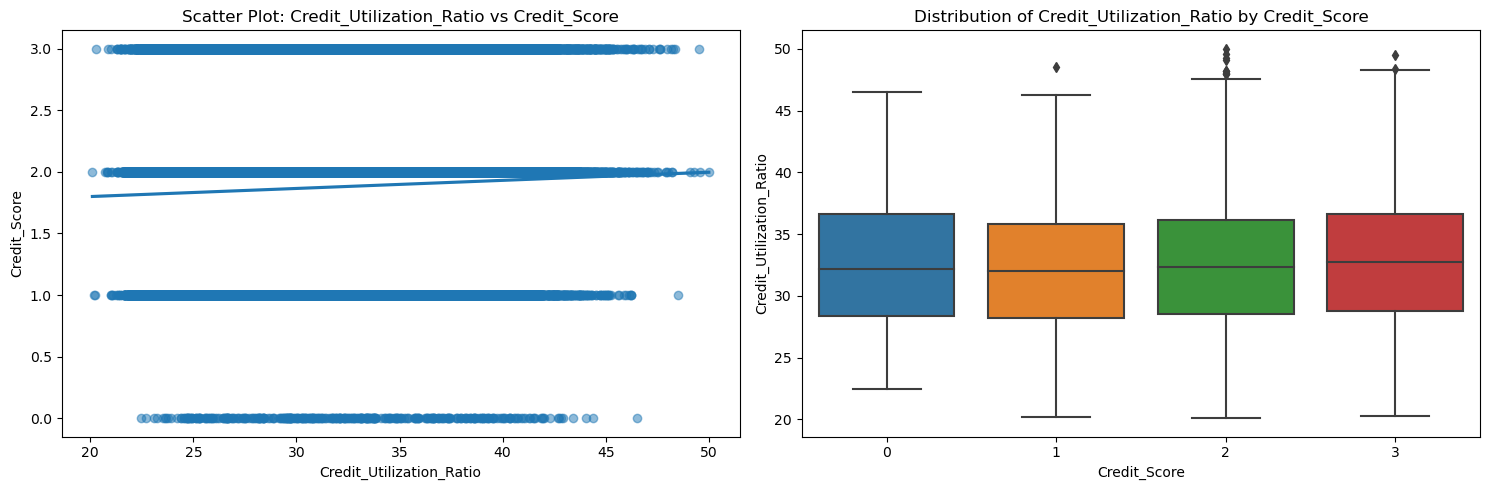


Statistical Summary:
------------------------------
              count       mean       std        min        max
Credit_Score                                                  
0               352  32.481350  5.197358  22.476023  46.504171
1             28953  31.984413  4.836464  20.172942  48.489852
2             52974  32.322537  4.896141  20.100770  50.000000
3             17721  32.690746  5.001577  20.257073  49.522324

Correlation between Credit_Utilization_Ratio and Credit_Score: 0.047

Analysis of Credit_History_Age vs Credit_Score
--------------------------------------------------


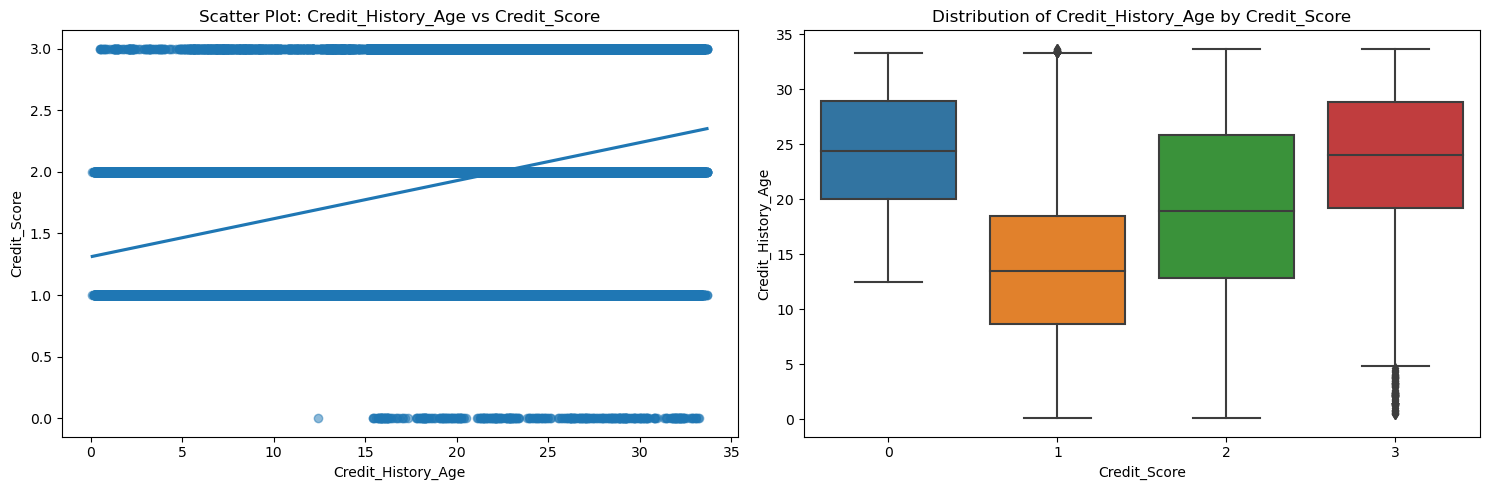


Statistical Summary:
------------------------------
              count       mean       std        min        max
Credit_Score                                                  
0               352  24.408381  5.240779  12.416667  33.250000
1             28953  14.157813  7.293139   0.083333  33.666667
2             52974  18.963559  8.286222   0.083333  33.666667
3             17721  23.718310  6.110671   0.500000  33.666667

Correlation between Credit_History_Age and Credit_Score: 0.376

Analysis of Amount_invested_monthly vs Credit_Score
--------------------------------------------------


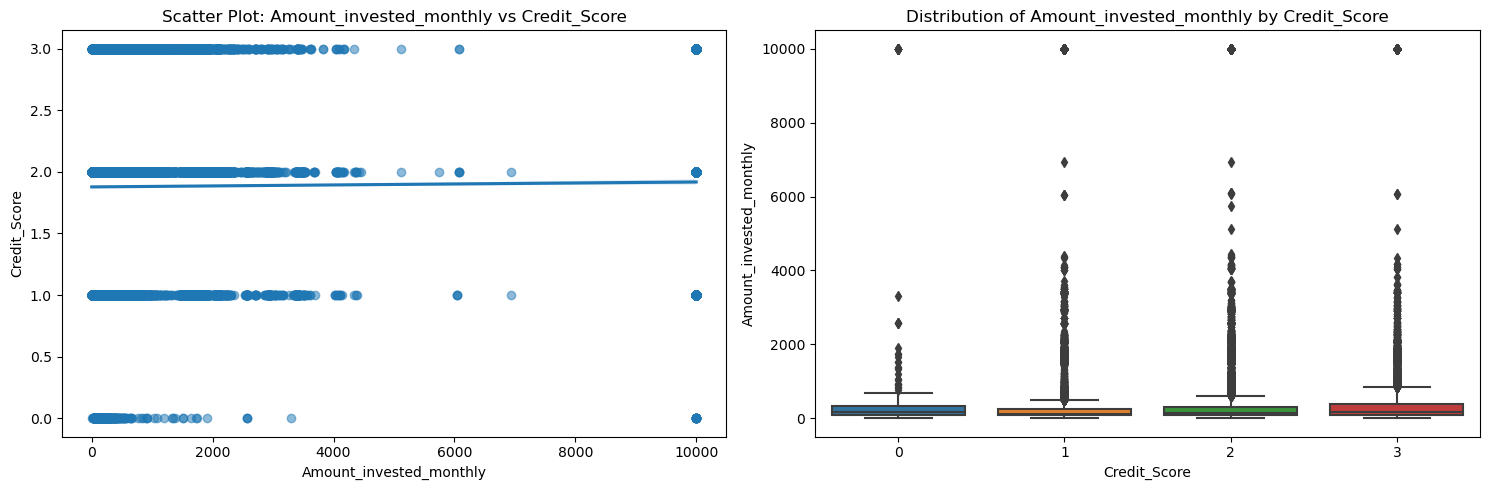


Statistical Summary:
------------------------------
              count        mean          std  min      max
Credit_Score                                              
0               352  667.972957  1941.118121  0.0  10000.0
1             28953  615.898643  1951.931561  0.0  10000.0
2             52974  631.398295  1906.035530  0.0  10000.0
3             17721  686.743026  1899.042738  0.0  10000.0

Correlation between Amount_invested_monthly and Credit_Score: 0.011

Analysis of Has_Payday_Loan vs Credit_Score
--------------------------------------------------


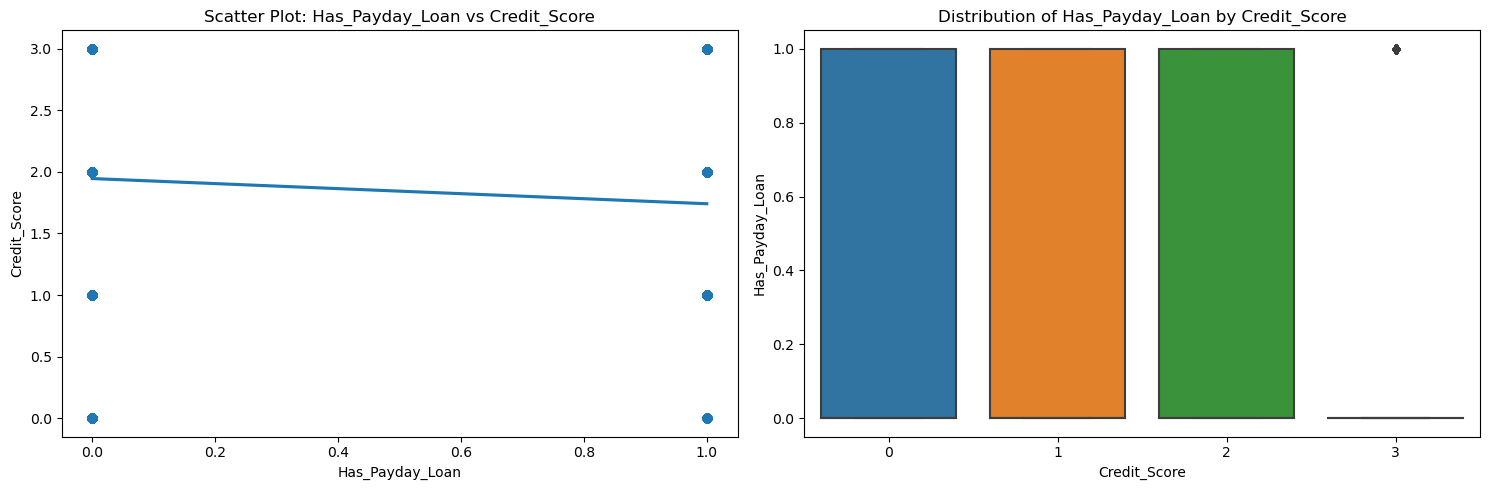


Statistical Summary:
------------------------------
              count      mean       std  min  max
Credit_Score                                     
0               352  0.292614  0.455610    0    1
1             28953  0.411909  0.492187    0    1
2             52974  0.302866  0.459502    0    1
3             17721  0.218441  0.413200    0    1

Correlation between Has_Payday_Loan and Credit_Score: -0.140

Analysis of Has_Credit_Builder_Loan vs Credit_Score
--------------------------------------------------


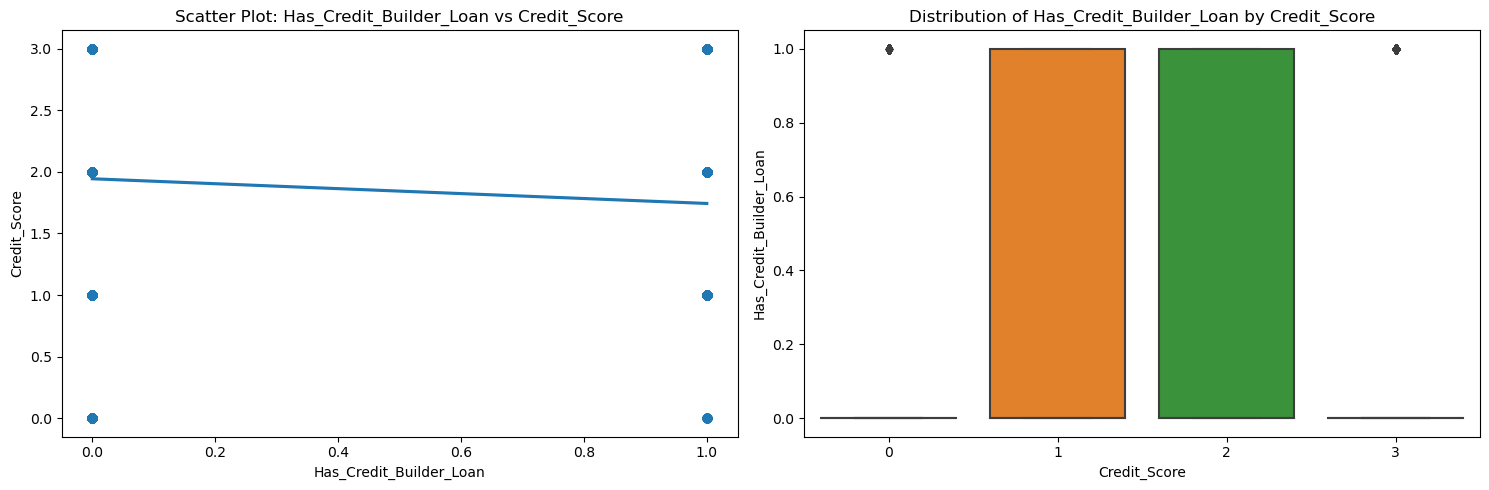


Statistical Summary:
------------------------------
              count      mean       std  min  max
Credit_Score                                     
0               352  0.187500  0.390868    0    1
1             28953  0.409733  0.491793    0    1
2             52974  0.300846  0.458630    0    1
3             17721  0.217934  0.412854    0    1

Correlation between Has_Credit_Builder_Loan and Credit_Score: -0.137

Analysis of Has_Not_Specified_Loan vs Credit_Score
--------------------------------------------------


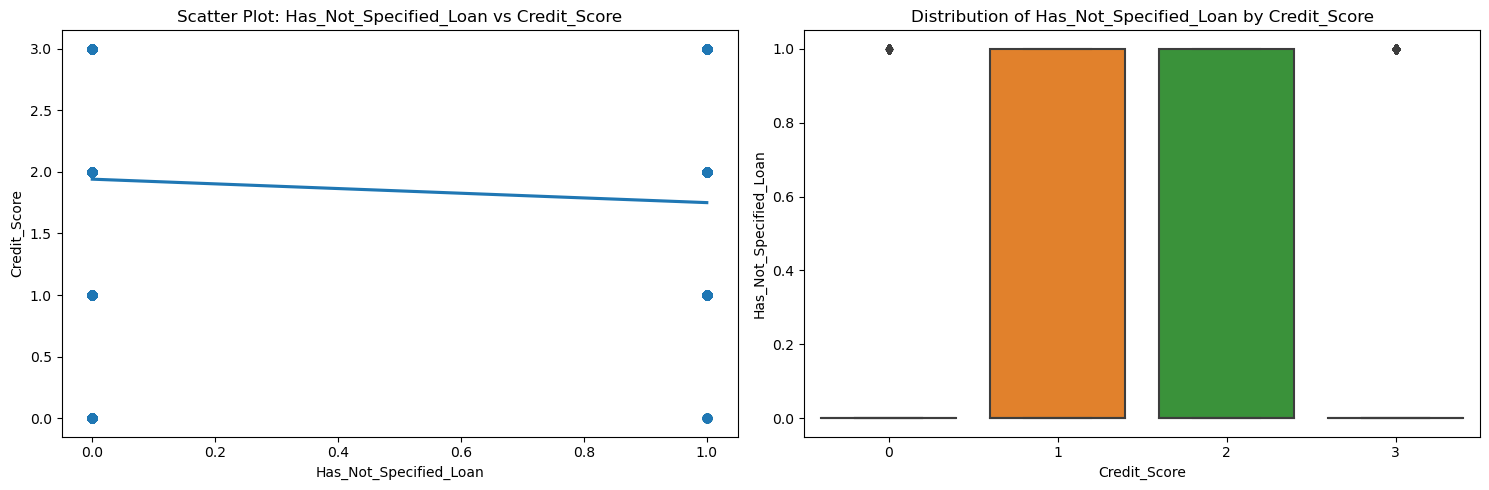


Statistical Summary:
------------------------------
              count      mean       std  min  max
Credit_Score                                     
0               352  0.159091  0.366281    0    1
1             28953  0.409180  0.491691    0    1
2             52974  0.296787  0.456846    0    1
3             17721  0.228825  0.420088    0    1

Correlation between Has_Not_Specified_Loan and Credit_Score: -0.130

Analysis of Has_Home_Equity_Loan vs Credit_Score
--------------------------------------------------


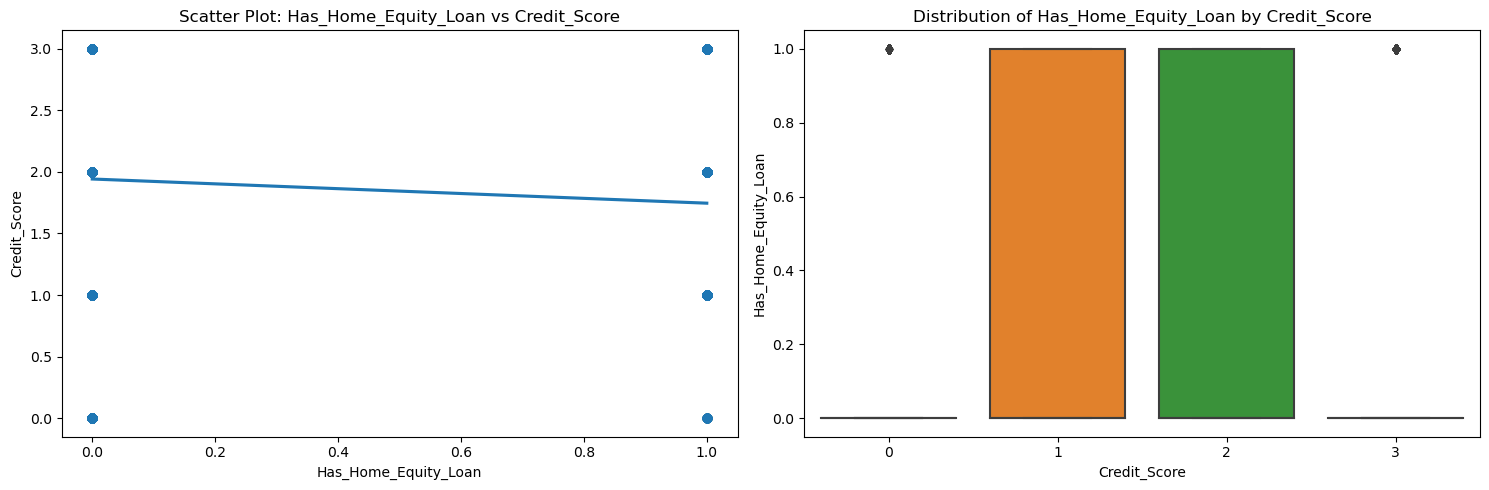


Statistical Summary:
------------------------------
              count      mean       std  min  max
Credit_Score                                     
0               352  0.247159  0.431974    0    1
1             28953  0.401755  0.490261    0    1
2             52974  0.299241  0.457930    0    1
3             17721  0.216071  0.411575    0    1

Correlation between Has_Home_Equity_Loan and Credit_Score: -0.133

Analysis of Has_Mortgage_Loan vs Credit_Score
--------------------------------------------------


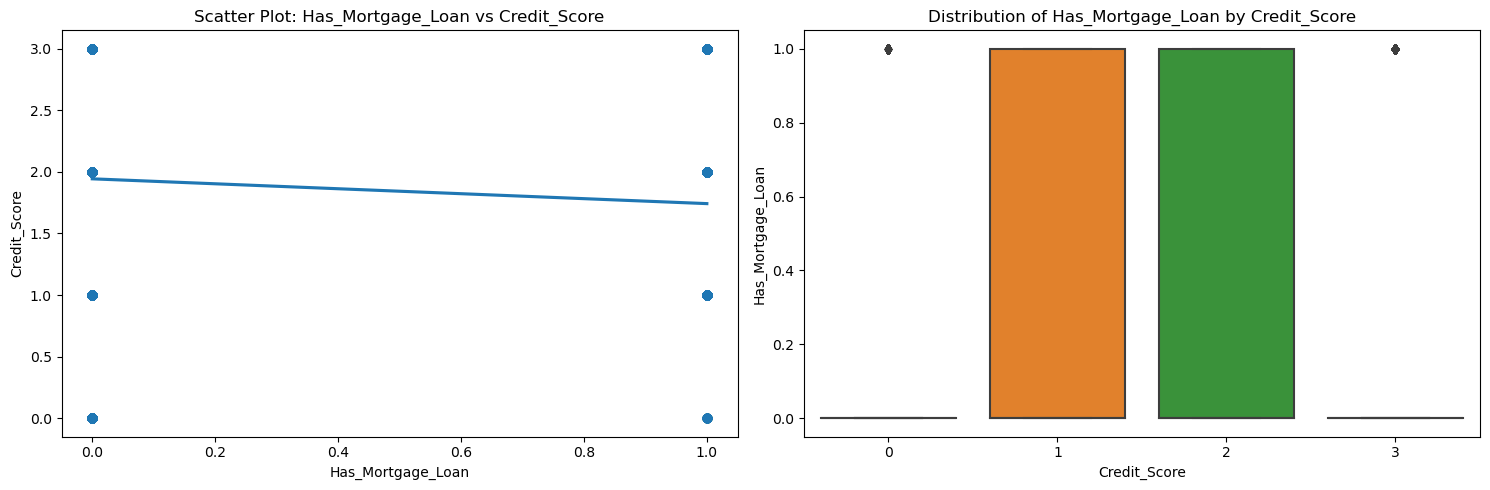


Statistical Summary:
------------------------------
              count      mean       std  min  max
Credit_Score                                     
0               352  0.193182  0.395356    0    1
1             28953  0.407246  0.491330    0    1
2             52974  0.295466  0.456256    0    1
3             17721  0.217200  0.412351    0    1

Correlation between Has_Mortgage_Loan and Credit_Score: -0.137

Analysis of Has_Personal_Loan vs Credit_Score
--------------------------------------------------


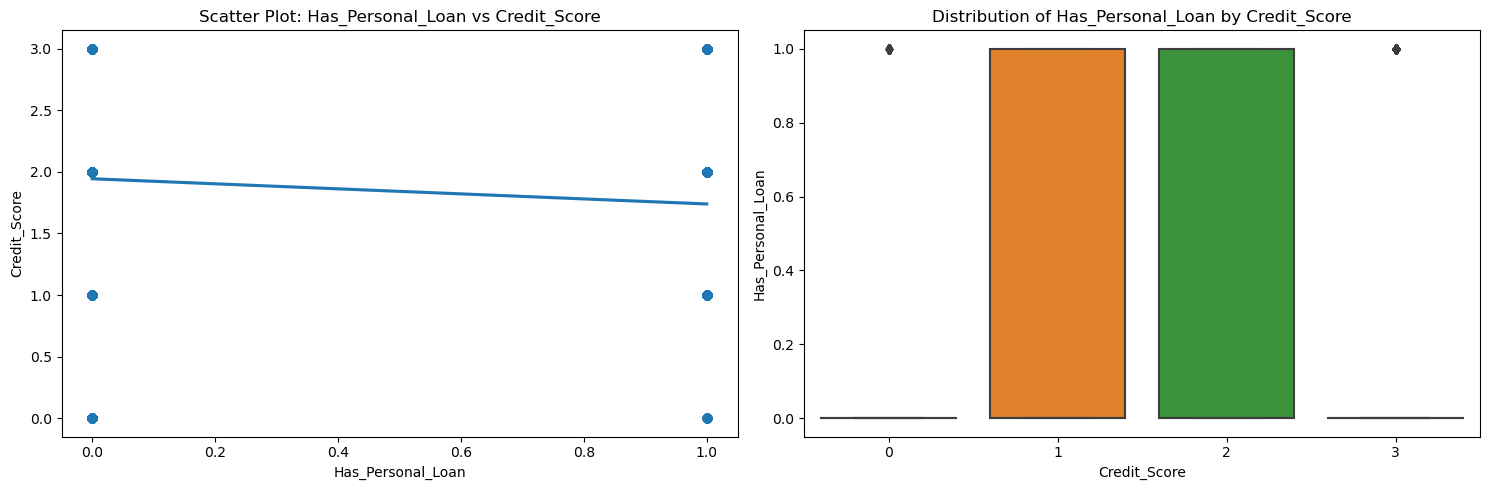


Statistical Summary:
------------------------------
              count      mean       std  min  max
Credit_Score                                     
0               352  0.221591  0.415908    0    1
1             28953  0.399199  0.489742    0    1
2             52974  0.299298  0.457955    0    1
3             17721  0.203882  0.402894    0    1

Correlation between Has_Personal_Loan and Credit_Score: -0.139

Analysis of Has_Student_Loan vs Credit_Score
--------------------------------------------------


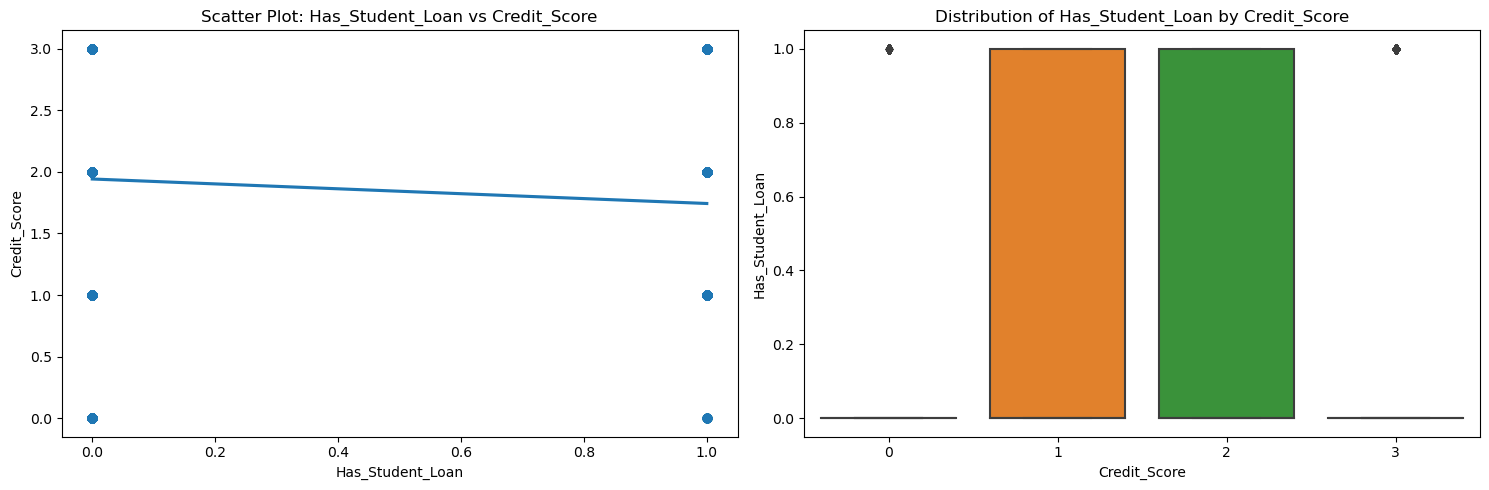


Statistical Summary:
------------------------------
              count      mean       std  min  max
Credit_Score                                     
0               352  0.164773  0.371503    0    1
1             28953  0.404207  0.490746    0    1
2             52974  0.291181  0.454311    0    1
3             17721  0.217482  0.412545    0    1

Correlation between Has_Student_Loan and Credit_Score: -0.135

Analysis of Has_Debt_Consolidation_Loan vs Credit_Score
--------------------------------------------------


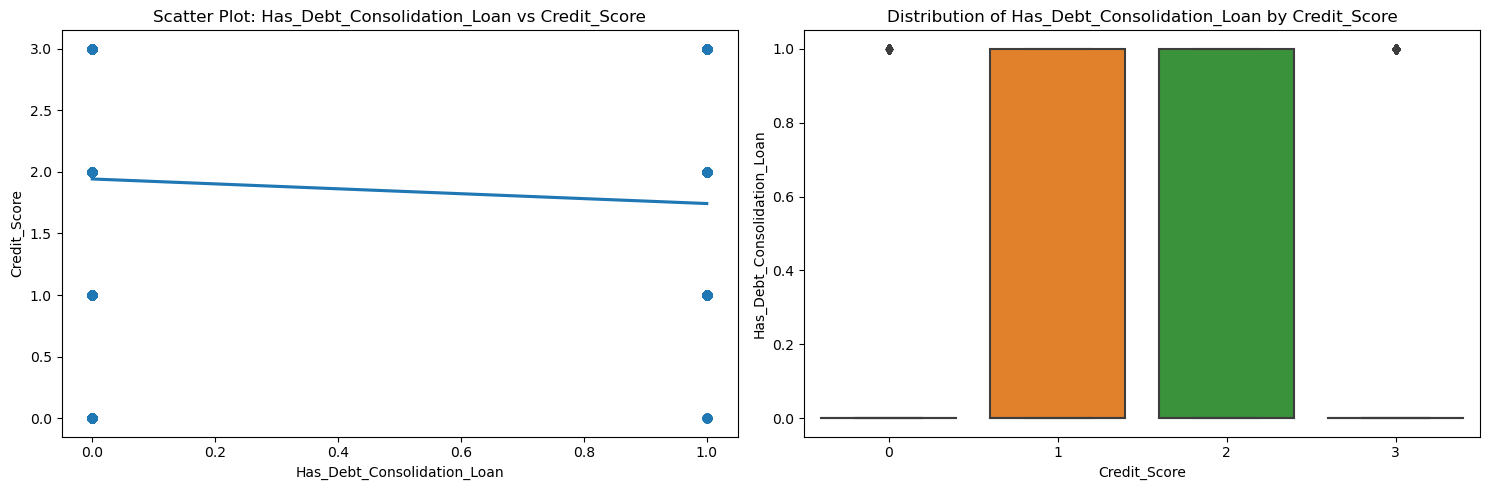


Statistical Summary:
------------------------------
              count      mean       std  min  max
Credit_Score                                     
0               352  0.167614  0.374055    0    1
1             28953  0.398542  0.489607    0    1
2             52974  0.297504  0.457165    0    1
3             17721  0.207776  0.405727    0    1

Correlation between Has_Debt_Consolidation_Loan and Credit_Score: -0.135

Analysis of Has_Auto_Loan vs Credit_Score
--------------------------------------------------


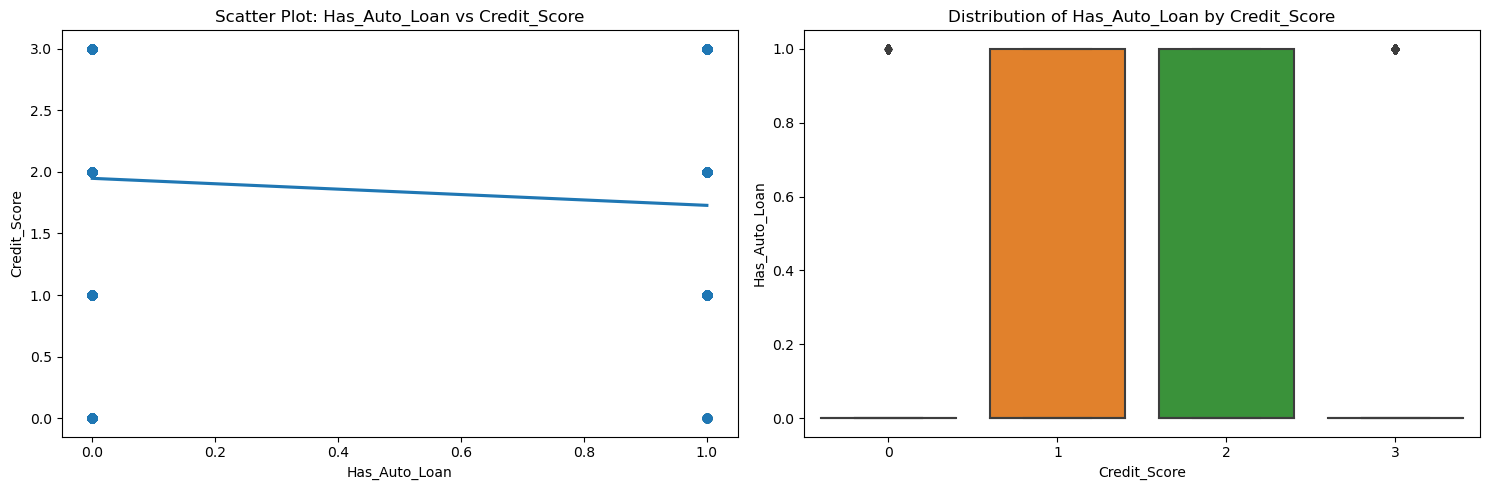


Statistical Summary:
------------------------------
              count      mean       std  min  max
Credit_Score                                     
0               352  0.230114  0.421505    0    1
1             28953  0.403551  0.490618    0    1
2             52974  0.287953  0.452813    0    1
3             17721  0.199819  0.399876    0    1

Correlation between Has_Auto_Loan and Credit_Score: -0.148

Analysis of Loan_Count vs Credit_Score
--------------------------------------------------


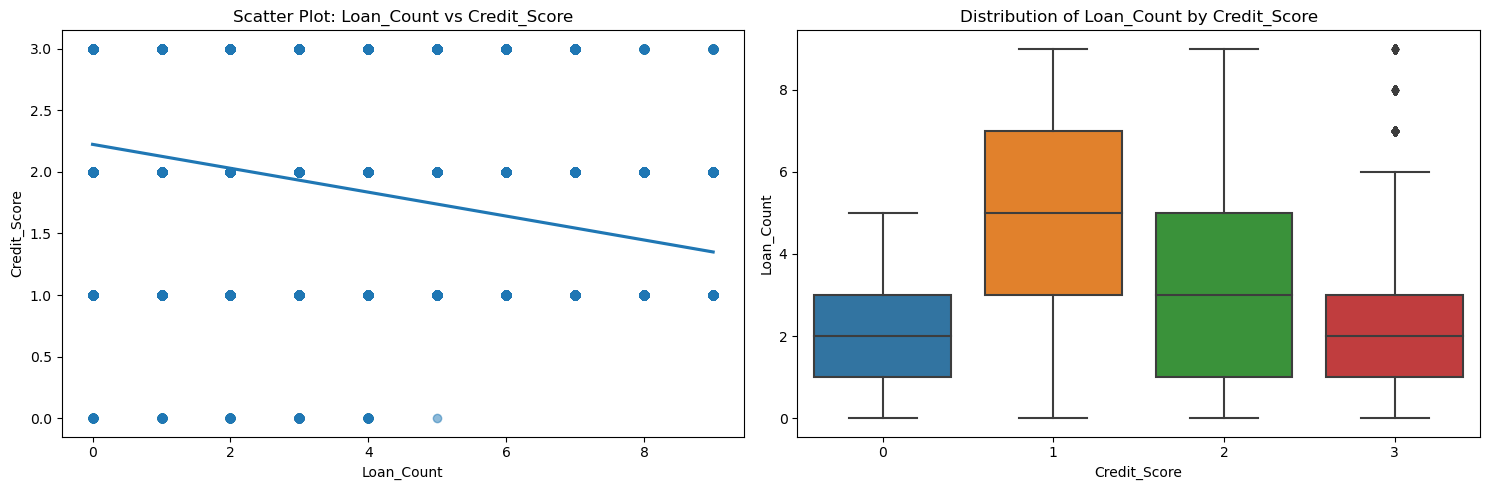


Statistical Summary:
------------------------------
              count      mean       std  min  max
Credit_Score                                     
0               352  2.144886  1.339314    0    5
1             28953  4.760405  2.434475    0    9
2             52974  3.316155  2.378273    0    9
3             17721  2.202754  1.653891    0    9

Correlation between Loan_Count and Credit_Score: -0.348


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

target = 'Credit_Score'

for feature in numeric_features:    
        print(f"\nAnalysis of {feature} vs {target}")
        print("-" * 50)
        
        # Create figure with 2 subplots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
        
        # Plot 1: Scatter plot with regression line
        sns.regplot(data=df, x=feature, y=target, ax=ax1, scatter_kws={'alpha':0.5})
        ax1.set_title(f'Scatter Plot: {feature} vs {target}')
        
        # Plot 2: Box plot grouped by target
        sns.boxplot(data=df, y=feature, x=target, ax=ax2)
        ax2.set_title(f'Distribution of {feature} by {target}')
        
        plt.tight_layout()
        plt.show()
        
        # Statistical Summary
        print("\nStatistical Summary:")
        print("-" * 30)
        summary = df.groupby(target)[feature].agg(['count', 'mean', 'std', 'min', 'max'])
        print(summary)
        
        # Correlation
        correlation = df[[feature, target]].corr().iloc[0,1]
        print(f"\nCorrelation between {feature} and {target}: {correlation:.3f}")

- **Age** shows a slight uptick with score (corr = 0.134) – older customers tend to edge into higher bands, but it’s a weak effect.  

- **Annual_Income** is essentially flat (corr = 0.009) – overall income doesn’t differentiate scores here.  

- **Monthly_Inhand_Salary** has a modest positive trend (corr = 0.203) – higher take-home pay nudges scores upward.  

- **Num_Bank_Accounts** falls off as scores rise (corr = –0.369) – more accounts slightly link to lower scores.  

- **Num_Credit_Card** behaves similarly (corr = –0.379) – lots of cards tends to coincide with poorer credit.  

- **Interest_Rate** is strongly negative (corr = –0.471) – higher borrowing rates clearly map to lower scores.  

- **Delay_from_due_date** also dips markedly (corr = –0.420) – longer payment delays predict worse credit.  

- **Num_of_Delayed_Payment** is moderately negative (corr = –0.362) – more delayed payments go hand-in-hand with low scores.  

- **Changed_Credit_Limit** shows a mild negative link (corr = –0.163) – big limit swings tend to occur at lower credit tiers.  

- **Num_Credit_Inquiries** is moderately negative (corr = –0.420) – frequent inquiries are a red flag for lower scores.  

- **Outstanding_Debt** also pulls downward (corr = –0.377) – heavier debt burdens align with poorer credit.  

- **Credit_Utilization_Ratio** is nearly flat (corr = 0.047) – utilization here doesn’t strongly move the needle.  

- **Credit_History_Age** has a decent positive slope (corr = 0.376) – longer histories boost scores.  

- **Amount_invested_monthly** is essentially static (corr = 0.011) – investment habits don’t track with credit.  

- Each **loan flag** (`Has_Payday_Loan` through `Has_Auto_Loan`) sits around corr ≈ –0.13 – holding any loan type nudges your score down slightly.  

- **Loan_Count** as a whole trends negative (corr = –0.348) – more total loans tend to coincide with lower credit scores.  

## Categorical features

In [18]:
list_categorical_features = get_categorical_features(df)
print("\nCategorical columns (with number of unique values):")

for col in list_categorical_features:
    value_counts = df[col].value_counts()
    print(f"{col}: ({len(value_counts)})")



Categorical columns (with number of unique values):
Customer_ID: (12500)
Month: (8)
City: (4)
Street: (31)
Occupation: (21)
Credit_Mix: (4)
Payment_of_Min_Amount: (3)


- There are **7 categorical** columns with the following unique counts:
  - `Customer_ID`: 12 500  
  - `Month`: 8  
  - `City`: 4  
  - `Street`: 31  
  - `Occupation`: 21  
  - `Credit_Mix`: 4  
  - `Payment_of_Min_Amount`: 3  
- Aside from `Customer_ID` (which uniquely identifies customers across months), most categoricals are low-cardinality—`City`, `Credit_Mix` and `Payment_of_Min_Amount` each have ≤ 4 levels.
- `Street` (31 levels) and `Occupation` (21 levels) are moderate cardinality and may need grouping or target encoding to avoid high-dimensional one-hot encodings.
- `Month` covers 8 periods (likely January–August), which should be straightforward to encode as cyclical or ordinal.

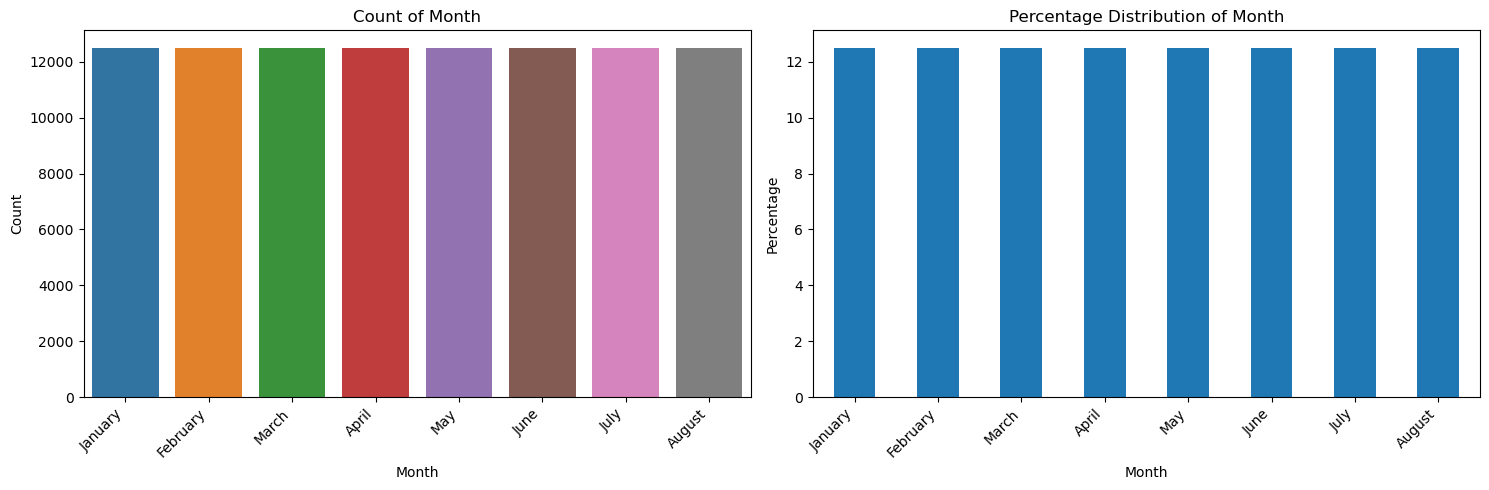


Month Statistics:
--------------------------------------------------
January             :    12500 ( 12.50%)
February            :    12500 ( 12.50%)
March               :    12500 ( 12.50%)
April               :    12500 ( 12.50%)
May                 :    12500 ( 12.50%)
June                :    12500 ( 12.50%)
July                :    12500 ( 12.50%)
August              :    12500 ( 12.50%)




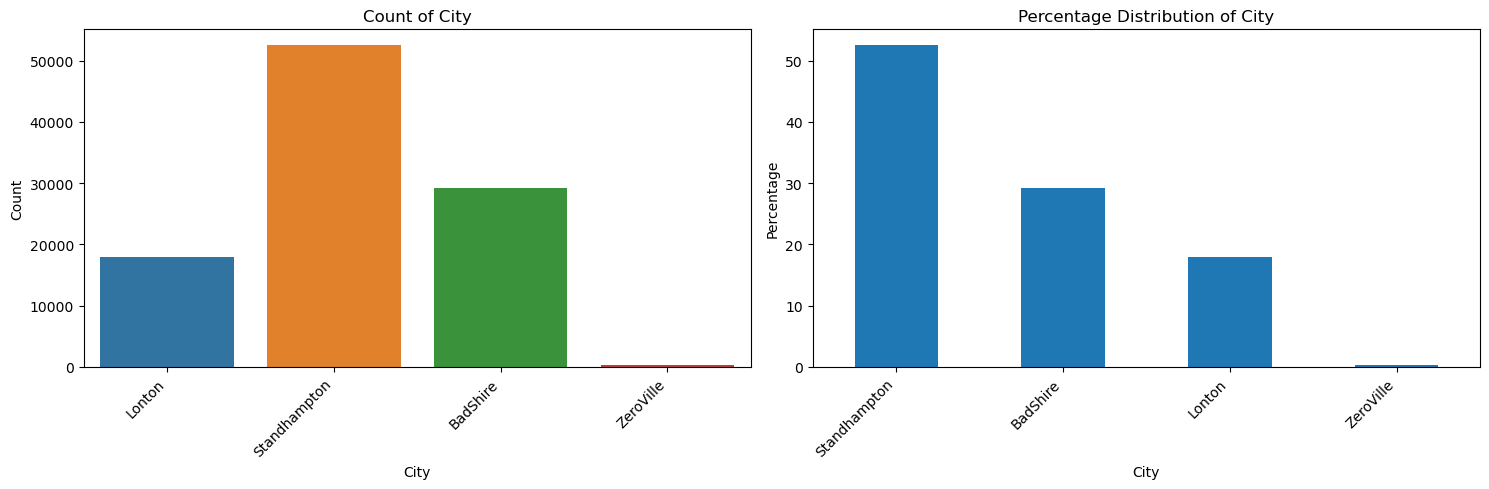


City Statistics:
--------------------------------------------------
Standhampton        :    52486 ( 52.49%)
BadShire            :    29267 ( 29.27%)
Lonton              :    17902 ( 17.90%)
ZeroVille           :      345 (  0.34%)




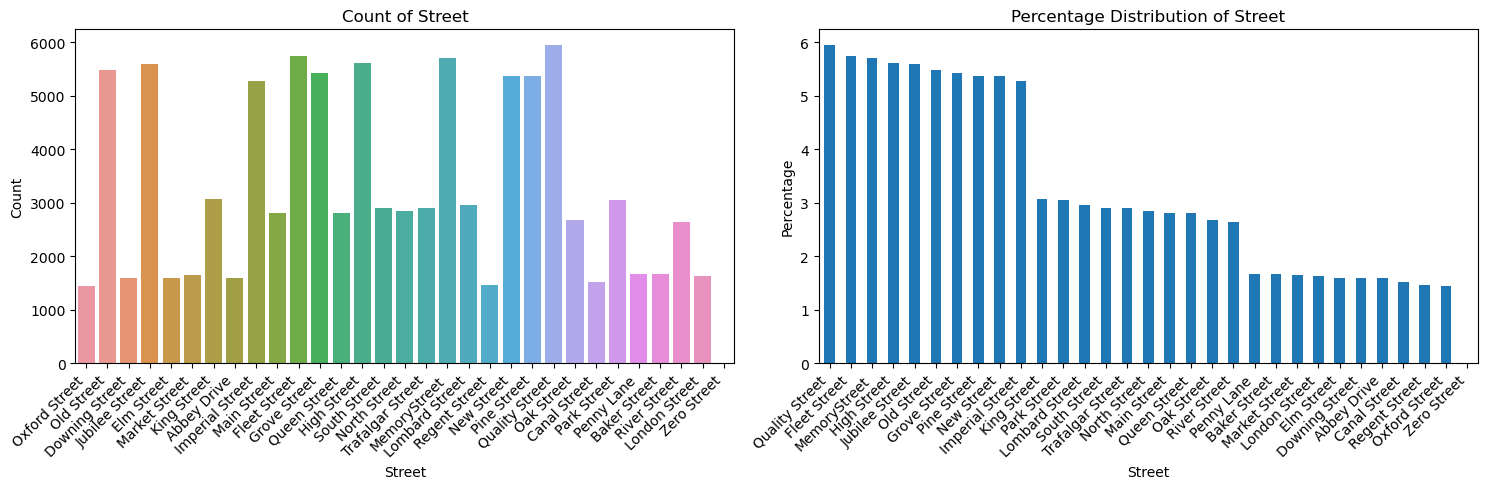


Street Statistics:
--------------------------------------------------
Quality Street      :     5944 (  5.94%)
Fleet Street        :     5752 (  5.75%)
MemoryStreet        :     5712 (  5.71%)
High Street         :     5616 (  5.62%)
Jubilee Street      :     5592 (  5.59%)
Old Street          :     5472 (  5.47%)
Grove Street        :     5432 (  5.43%)
Pine Street         :     5376 (  5.38%)
New Street          :     5360 (  5.36%)
Imperial Street     :     5280 (  5.28%)
King Street         :     3072 (  3.07%)
Park Street         :     3048 (  3.05%)
Lombard Street      :     2960 (  2.96%)
South Street        :     2896 (  2.90%)
Trafalgar Street    :     2896 (  2.90%)
North Street        :     2848 (  2.85%)
Main Street         :     2816 (  2.82%)
Queen Street        :     2808 (  2.81%)
Oak Street          :     2680 (  2.68%)
River Street        :     2632 (  2.63%)
Penny Lane          :     1664 (  1.66%)
Baker Street        :     1664 (  1.66%)
Market Street       :     1

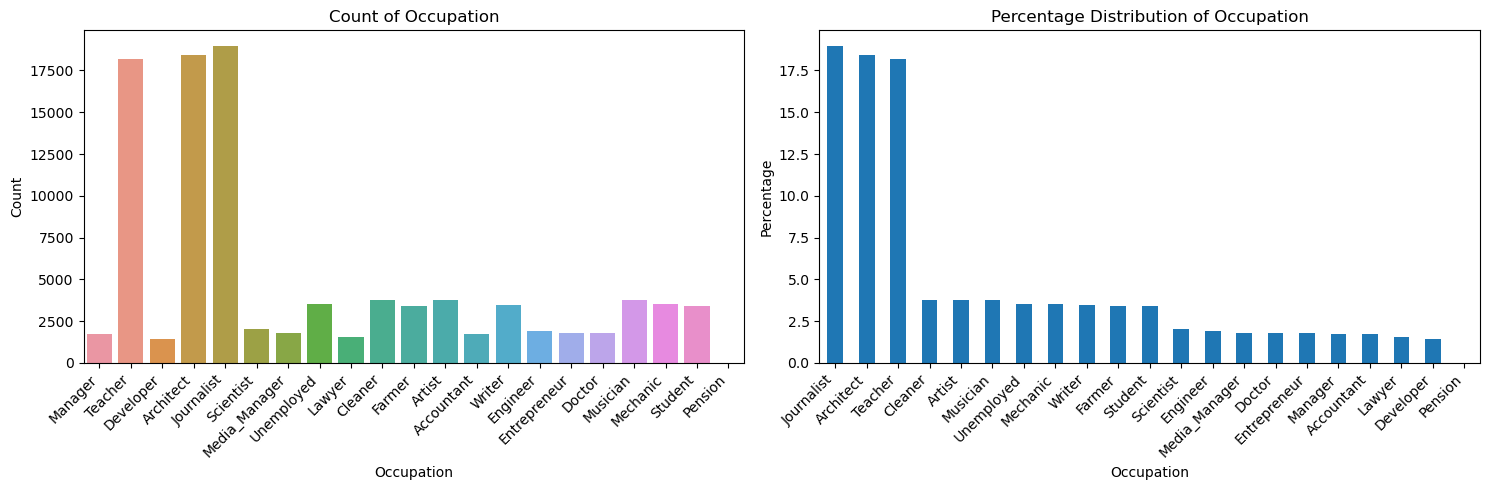


Occupation Statistics:
--------------------------------------------------
Journalist          :    18952 ( 18.95%)
Architect           :    18400 ( 18.40%)
Teacher             :    18184 ( 18.18%)
Cleaner             :     3784 (  3.78%)
Artist              :     3760 (  3.76%)
Musician            :     3752 (  3.75%)
Unemployed          :     3552 (  3.55%)
Mechanic            :     3504 (  3.50%)
Writer              :     3488 (  3.49%)
Farmer              :     3432 (  3.43%)
Student             :     3384 (  3.38%)
Scientist           :     2008 (  2.01%)
Engineer            :     1896 (  1.90%)
Media_Manager       :     1808 (  1.81%)
Doctor              :     1792 (  1.79%)
Entrepreneur        :     1784 (  1.78%)
Manager             :     1752 (  1.75%)
Accountant          :     1752 (  1.75%)
Lawyer              :     1576 (  1.58%)
Developer           :     1432 (  1.43%)
Pension             :        8 (  0.01%)




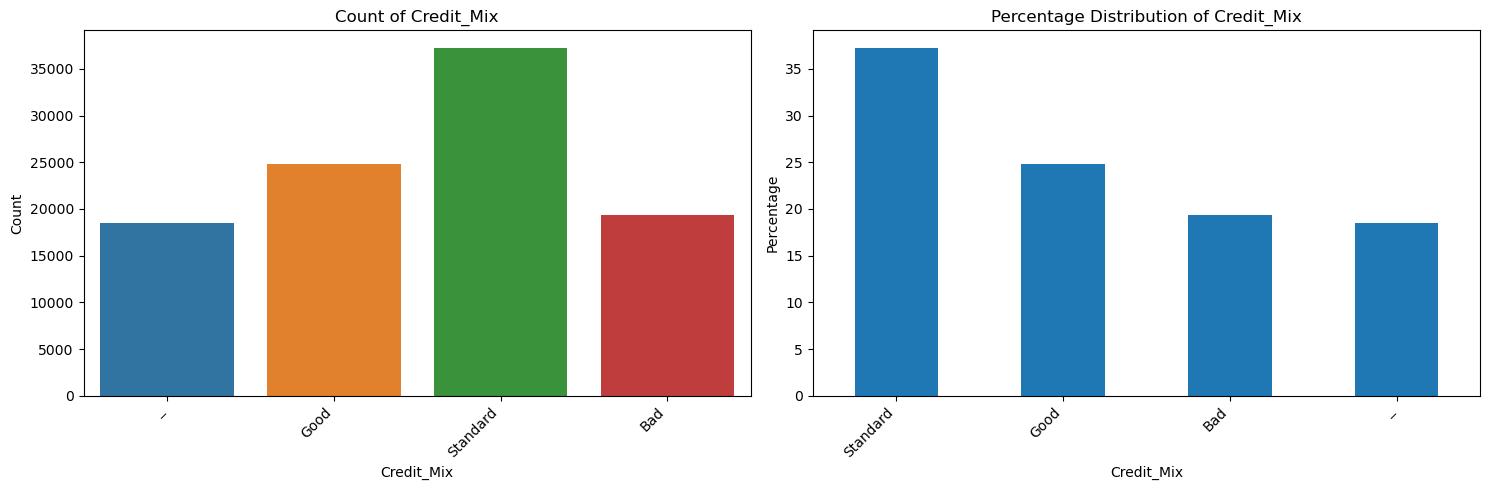


Credit_Mix Statistics:
--------------------------------------------------
Standard            :    37265 ( 37.27%)
Good                :    24841 ( 24.84%)
Bad                 :    19392 ( 19.39%)
_                   :    18502 ( 18.50%)




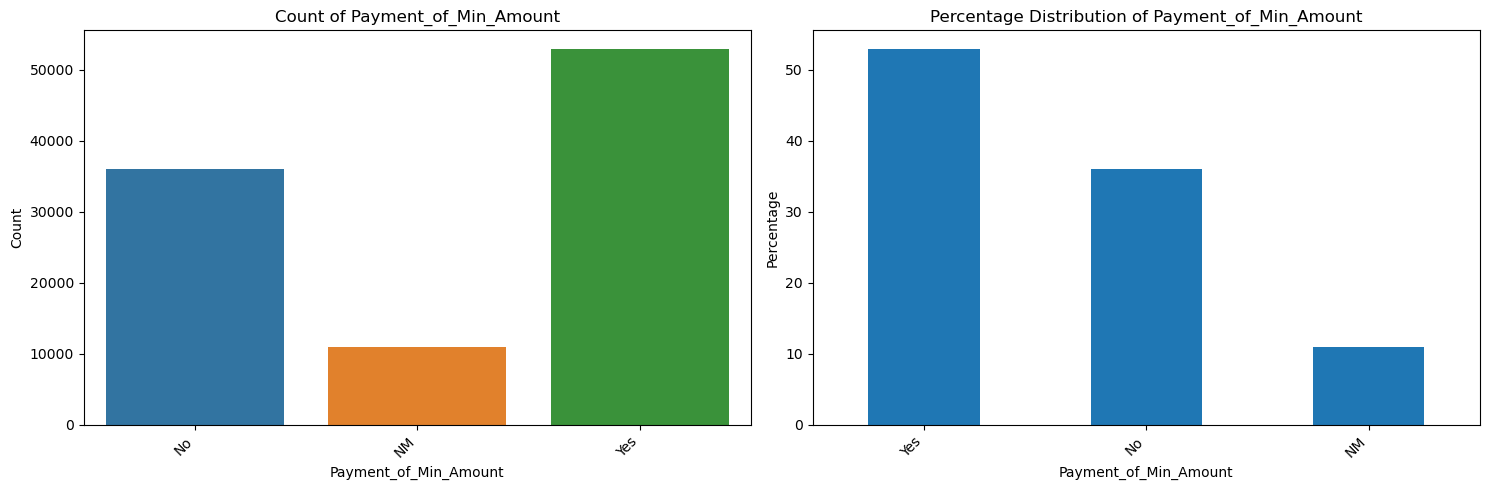


Payment_of_Min_Amount Statistics:
--------------------------------------------------
Yes                 :    52934 ( 52.93%)
No                  :    36085 ( 36.09%)
NM                  :    10981 ( 10.98%)




In [19]:
true_categorical_features = ['Month', 'City', 'Street', 'Occupation', 'Credit_Mix', 'Payment_of_Min_Amount']


for col in true_categorical_features:
        # Create figure with 2 subplots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
        
        # Create a copy of the column with missing values as a category
        df_with_missing = df.copy()
        df_with_missing[col] = df_with_missing[col].fillna('Missing')
        
        # Plot 1: Count plot
        sns.countplot(data=df_with_missing, x=col, ax=ax1)
        ax1.set_title(f'Count of {col}')
        ax1.set_xlabel(col)
        ax1.set_ylabel('Count')
        plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')
        
        # Plot 2: Percentage plot
        (df_with_missing[col].value_counts(normalize=True) * 100).plot(kind='bar', ax=ax2)
        ax2.set_title(f'Percentage Distribution of {col}')
        ax2.set_xlabel(col)
        ax2.set_ylabel('Percentage')
        plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')
        
        plt.tight_layout()
        plt.show()
        
        # Print statistics
        print(f"\n{col} Statistics:")
        print("-" * 50)
        counts = df_with_missing[col].value_counts()
        percentages = df_with_missing[col].value_counts(normalize=True) * 100
        for category, count in counts.items():
            print(f"{category:20}: {count:8d} ({percentages[category]:6.2f}%)")
        print("\n")

- **Month** is perfectly balanced—each of the 8 months shows up in exactly 12.5% of rows.  

- **City** is dominated by Standhampton (52.5%), with BadShire at 29.3% and Lonton at 17.9%.  

- **Street** is very fragmented—no single street exceeds ~6%, the top 5 streets together cover ~28.6%, and the rest taper off in a long tail.  

- **Occupation** clusters heavily in three roles: Journalist (~19%), Architect (~18.4%), and Teacher (~18.2%), then drops sharply to ~3–4% for the next most common jobs.  

- **Credit_Mix** has ‘Standard’ as the largest group (37.3%), followed by ‘Good’ (24.8%), ‘Bad’ (19.4%), and ~18.5% unspecified.  

- **Payment_of_Min_Amount** shows that most people (52.9%) pay just the minimum, ~36.1% don’t, and ~11.0% are marked ‘NM’.  

### Relationship Between True Categorical Features and Credit Score


Analysis of Month vs Credit_Score
--------------------------------------------------

Statistical Summary:
------------------------------
          count     mean       std  min  max  percentage
Month                                                   
April     12500  1.88928  0.692315    0    3        12.5
August    12500  1.88984  0.702783    0    3        12.5
February  12500  1.87456  0.659196    0    3        12.5
January   12500  1.87128  0.654481    0    3        12.5
July      12500  1.88984  0.701416    0    3        12.5
June      12500  1.88016  0.699655    0    3        12.5
March     12500  1.86928  0.659626    0    3        12.5
May       12500  1.88088  0.692596    0    3        12.5


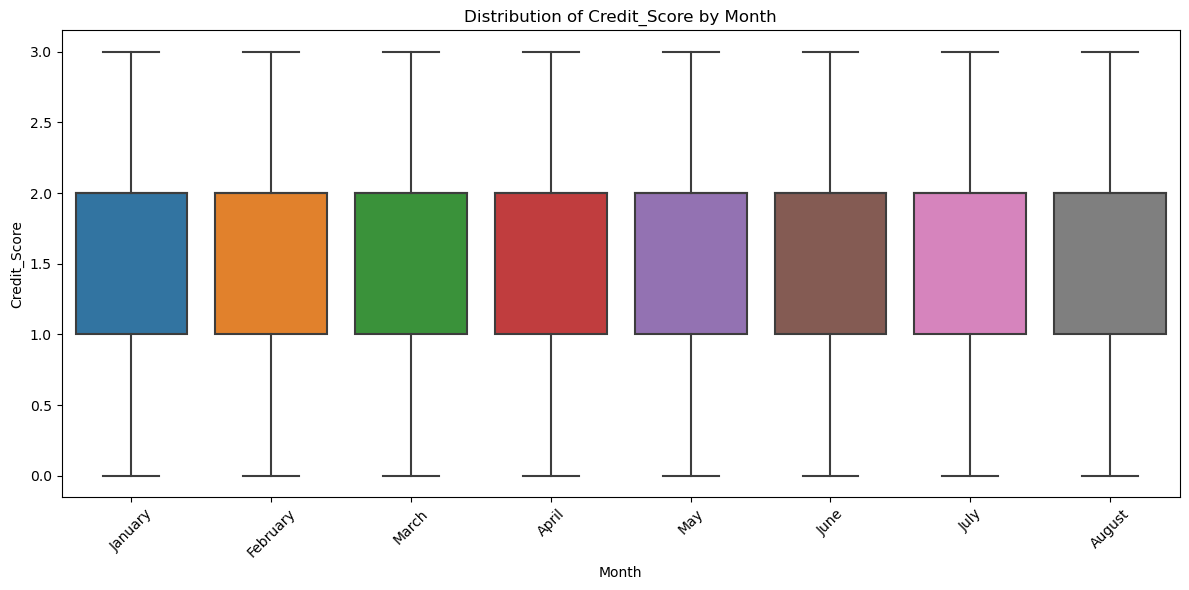


Analysis of City vs Credit_Score
--------------------------------------------------

Statistical Summary:
------------------------------
              count      mean       std  min  max  percentage
City                                                         
BadShire      29267  1.023371  0.151758    0    3       29.27
Lonton        17902  2.972685  0.167401    0    3       17.90
Standhampton  52486  1.998266  0.115391    0    3       52.49
ZeroVille       345  0.043478  0.315988    0    3        0.34


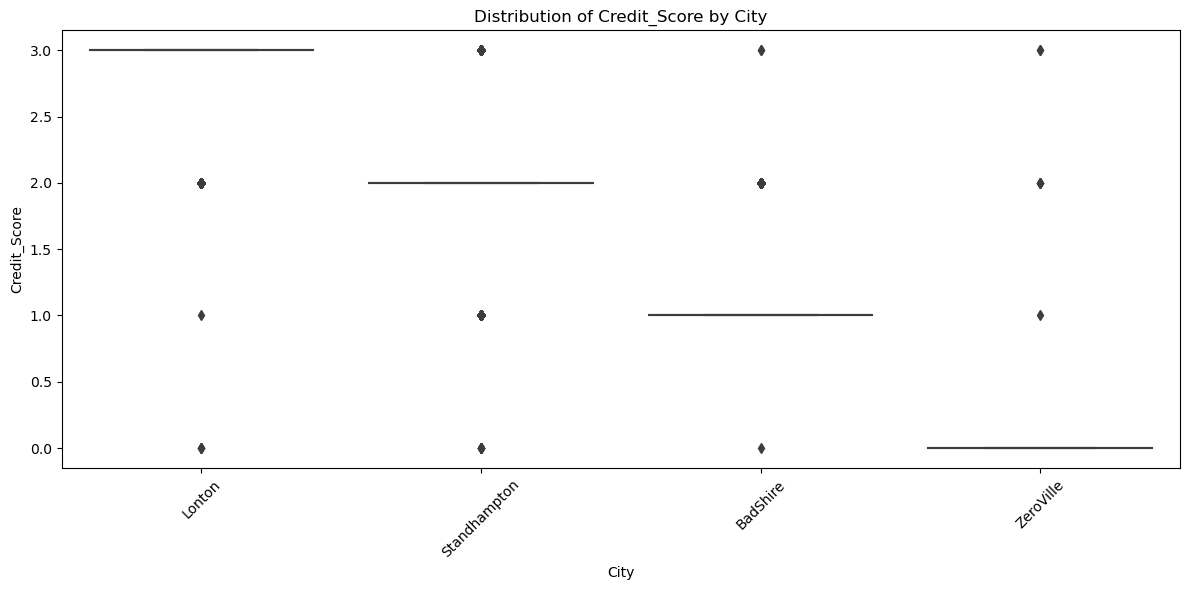


Analysis of Street vs Credit_Score
--------------------------------------------------

Statistical Summary:
------------------------------
                  count      mean       std  min  max  percentage
Street                                                           
Abbey Drive        1584  2.750000  0.443241    0    3        1.58
Baker Street       1664  2.777043  0.449683    0    3        1.66
Canal Street       1512  2.775794  0.460910    0    3        1.51
Downing Street     1592  2.756281  0.492200    0    3        1.59
Elm Street         1592  2.787060  0.464188    0    3        1.59
Fleet Street       5752  1.992177  0.452710    0    3        5.75
Grove Street       5432  1.971465  0.461873    0    3        5.43
High Street        5616  1.985399  0.485370    0    3        5.62
Imperial Street    5280  1.981629  0.476621    0    3        5.28
Jubilee Street     5592  1.966738  0.473934    0    3        5.59
King Street        3072  1.220378  0.414569    1    2        3.07
Lo

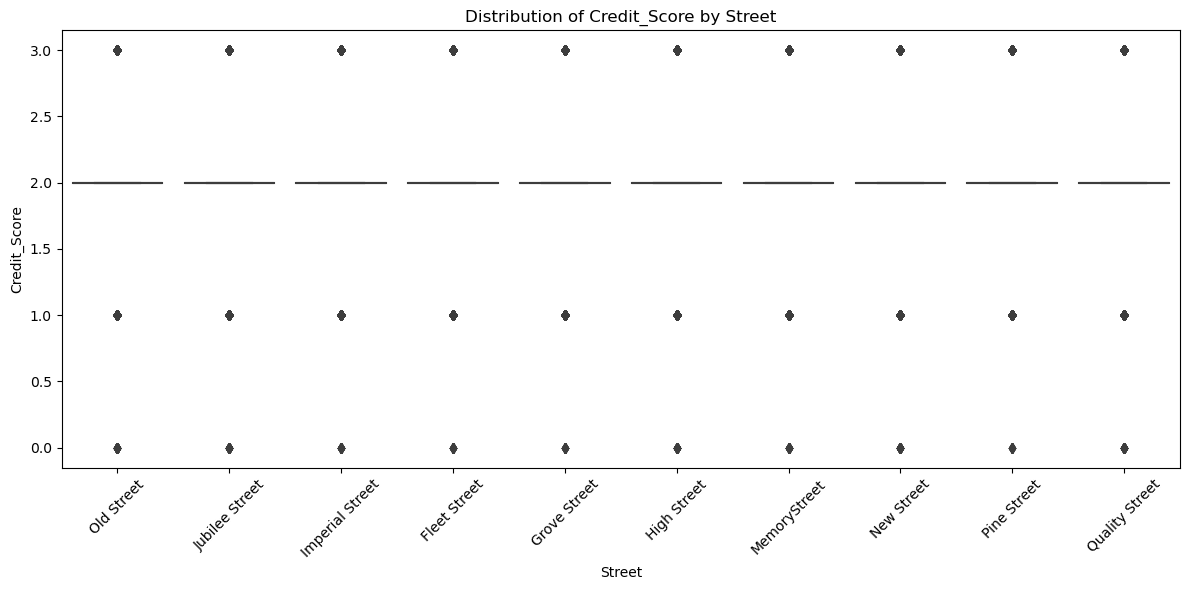


Analysis of Occupation vs Credit_Score
--------------------------------------------------

Statistical Summary:
------------------------------
               count      mean       std  min  max  percentage
Occupation                                                    
Accountant      1752  2.766553  0.480053    0    3        1.75
Architect      18400  1.974022  0.469030    0    3       18.40
Artist          3760  1.192021  0.398641    1    3        3.76
Cleaner         3784  1.196882  0.399684    0    2        3.78
Developer       1432  2.751397  0.534941    0    3        1.43
Doctor          1792  2.753348  0.441420    0    3        1.79
Engineer        1896  2.760021  0.468428    0    3        1.90
Entrepreneur    1784  2.762332  0.477907    0    3        1.78
Farmer          3432  1.205711  0.409295    0    2        3.43
Journalist     18952  1.977417  0.470340    0    3       18.95
Lawyer          1576  2.758883  0.490141    0    3        1.58
Manager         1752  2.792237  0.446

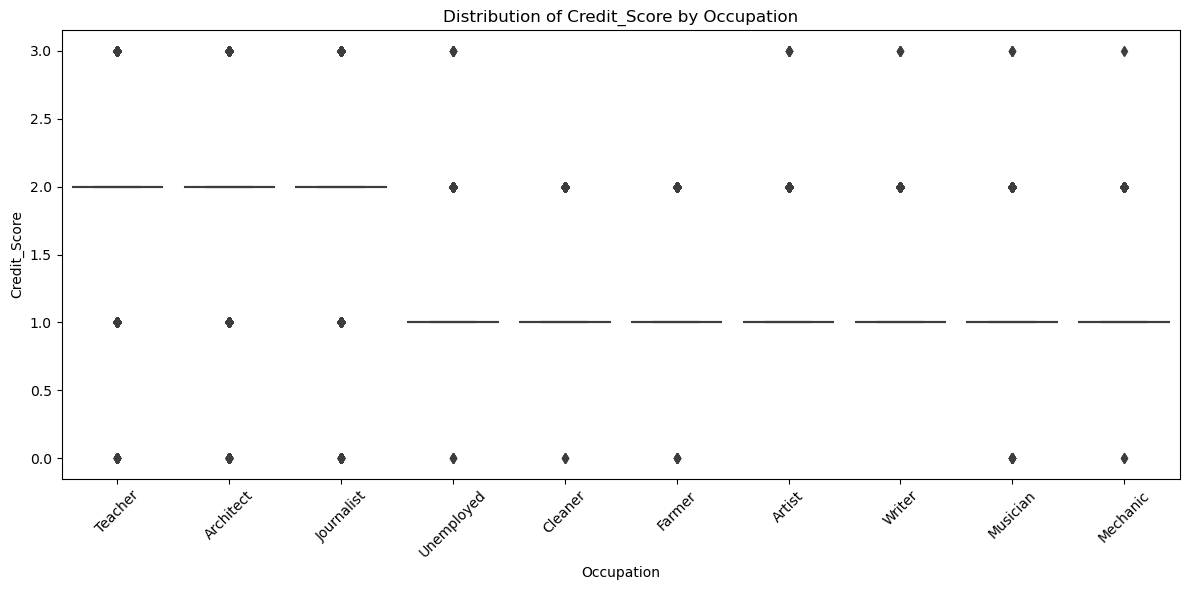


Analysis of Credit_Mix vs Credit_Score
--------------------------------------------------

Statistical Summary:
------------------------------
            count      mean       std  min  max  percentage
Credit_Mix                                                 
Bad         19392  1.414037  0.522936    0    3       19.39
Good        24841  2.315446  0.753365    0    3       24.84
Standard    37265  1.834000  0.507435    0    3       37.26
_           18502  1.879851  0.684241    0    3       18.50


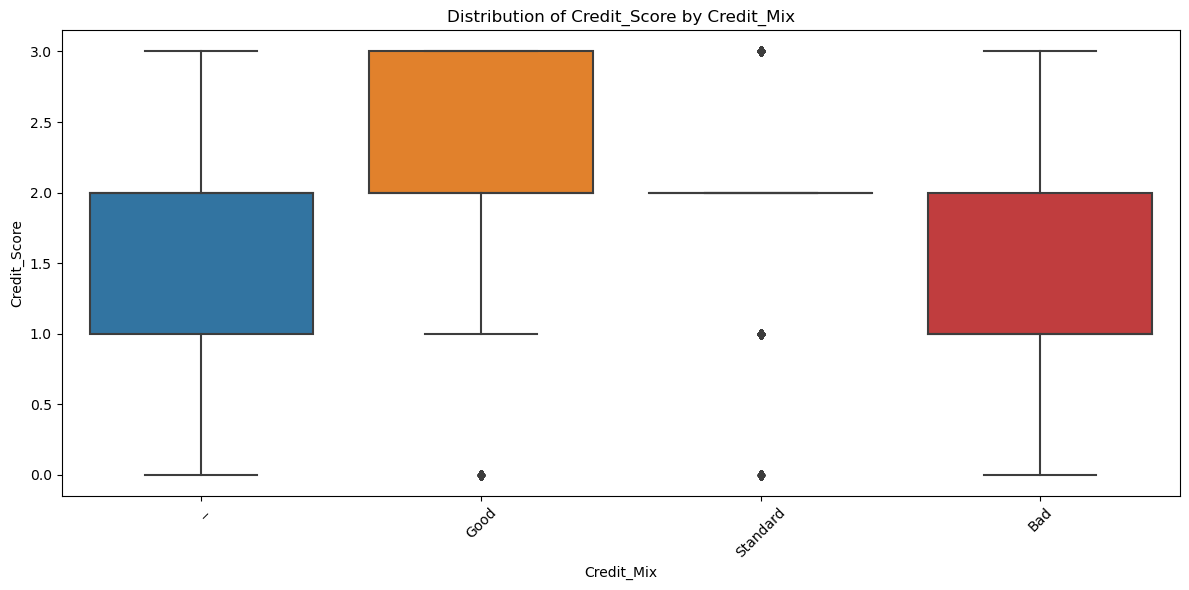


Analysis of Payment_of_Min_Amount vs Credit_Score
--------------------------------------------------

Statistical Summary:
------------------------------
                       count      mean       std  min  max  percentage
Payment_of_Min_Amount                                                 
NM                     10981  1.886258  0.691803    0    3       10.98
No                     36085  2.234474  0.697381    0    3       36.08
Yes                    52934  1.638267  0.553651    0    3       52.93


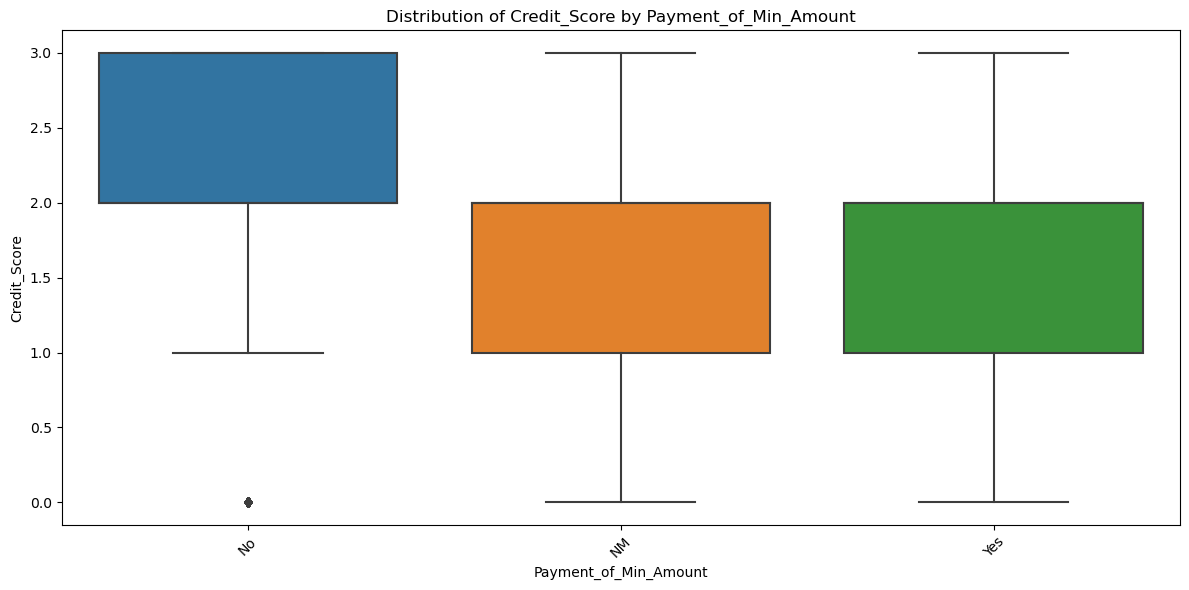

In [ ]:
target = 'Credit_Score'

for feature in true_categorical_features:    
    print(f"\nAnalysis of {feature} vs {target}")
    print("-" * 50)
    
    # Create a copy and handle missing values
    df_plot = df.copy()
    df_plot[feature] = df_plot[feature].fillna('Missing')
    
    # Statistical Summary
    print("\nStatistical Summary:")
    print("-" * 30)
    summary = df_plot.groupby(feature)[target].agg(['count', 'mean', 'std', 'min', 'max'])
    summary['percentage'] = (summary['count'] / len(df_plot) * 100).round(2)
    print(summary)
    
    # Visualization
    plt.figure(figsize=(12, 6))
    
    # Check if there are more than 10 categories
    if df_plot[feature].nunique() > 10:
        top_categories = df_plot[feature].value_counts().nlargest(10).index.tolist()
        df_plot = df_plot[df_plot[feature].isin(top_categories)]
        print(f"\nShowing only top 10 categories for {feature}")
    
    sns.boxplot(x=feature, y=target, data=df_plot)
    plt.title(f'Distribution of {target} by {feature}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


- **Month:** Mean credit scores hardly budge by month (March ~1.87 vs. July ~1.89), so there’s virtually no seasonal effect.  

- **City:** Huge differences here—Lonton customers average ~2.97, Standhampton ~1.99, BadShire ~1.02, and the tiny “ZeroVille” segment (~0.35% of data) scores near 0.0.  

- **Street:** Elm, Market and Baker Streets top out around ~2.78–2.79, while “Zero Street” (just 8 people) sits at 1.00, giving a range of nearly 1.8 points across locations.  

- **Occupation:** Scientists (~2.80), Media Managers (~2.79) and Managers (~2.79) have the strongest scores; pensioners (n=8) are at the bottom with ~1.00, showing clear profession-based 
gaps.  

- **Credit_Mix:** A “Good” mix yields ~2.32 on average, “Standard” ~2.02, and “Bad” ~1.41—better mix quality lines up with better scores.  

- **Payment_of_Min_Amount:** Interestingly, people who don’t pay the minimum (“No”) score highest (~2.23), “NM” around ~1.89, and those paying only the minimum (“Yes”) score lowest (~1.64).  